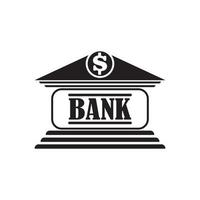




---
<h1><center>3rd Project - ETMT </center></h1>
<h1><center><font size=4><b>Developed by Samad KHANI - October, 2023 </center>





# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing necessary libraries

In [7]:
# to help with reading and manipulating data
import pandas as pd
import numpy as np

# to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# to be used for missing value imputation
from sklearn.impute import SimpleImputer

# to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier


from sklearn.dummy import DummyClassifier

# to get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)

# to be used for data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    RobustScaler,
)
from sklearn.impute import SimpleImputer

# to be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# to be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

In [8]:
# upgrade required
!pip install lightgbm
import lightgbm as lgb

In [9]:
# For oversampling and undersampling
! pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [10]:
# for pandas profiling
! pip install pandas-profiling
from pandas_profiling import ProfileReport

In [11]:
# printing style
!pip install tabulate
from tabulate import tabulate

In [12]:
# to define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# to supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")

In [13]:
# to supress warnings
import warnings

# date time
from datetime import datetime

warnings.filterwarnings("ignore")

## Loading the dataset

In [14]:
churn= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI training materials/Advanced Machine Learning/Project 3/BankChurners111.csv')
data = churn.copy()

## Data Overview

In [15]:
# data size
data.shape

(10127, 21)

In [16]:
# header view
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [18]:
# data types in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [19]:
# statistical summary of the numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


In [20]:
# statistical summary of the categorical columns
data.describe(include = ['object']).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [21]:
# missing data summary
# count and percentage of null values
null_summary = data.isnull().sum()
null_percentage = (data.isnull().mean()) * 100

# new DataFrame to hold the summary
summary_df = pd.DataFrame({'Null Count': null_summary, 'Null Percentage': null_percentage})

# filters columns with missing values and sort by percentage
summary_df = summary_df[summary_df['Null Count'] > 0].sort_values(by='Null Percentage', ascending=False)

# Display the summary
print(summary_df)


                 Null Count  Null Percentage
Education_Level        1519           15.000
Marital_Status          749            7.396


* the two columns require data treatment before any modelling

In [22]:
# check for duplicated values
data.duplicated().sum()

0

* no duplicated data observed

In [23]:
# unique values for categorical columns
data.select_dtypes(include = 'object').nunique()

Attrition_Flag     2
Gender             2
Education_Level    6
Marital_Status     3
Income_Category    6
Card_Category      4
dtype: int64

In [24]:
# unique values for numerical columns
data.select_dtypes(exclude = 'object').nunique()

CLIENTNUM                   10127
Customer_Age                   45
Dependent_count                 6
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [25]:
# function to print unique values and corresponding data counts for categorical columns

def category_unique_value(data):
    cat_columns = data.select_dtypes(exclude=[int, float]).columns.tolist()

    for col in cat_columns:
        print(f"Unique values & corresponding data counts for feature: {col}")
        print("_" * 90)

        counts = data[col].value_counts()
        percentages = data[col].value_counts(normalize=True) * 100

        df_temp = pd.DataFrame({'Count(#)': counts, 'Percentage(%)': percentages})
        print(df_temp)
        print("_" * 90)

# Call the function with your DataFrame 'data'
category_unique_value(data)


Unique values & corresponding data counts for feature: Attrition_Flag
__________________________________________________________________________________________
                   Count(#)  Percentage(%)
Existing Customer      8500         83.934
Attrited Customer      1627         16.066
__________________________________________________________________________________________
Unique values & corresponding data counts for feature: Gender
__________________________________________________________________________________________
   Count(#)  Percentage(%)
F      5358         52.908
M      4769         47.092
__________________________________________________________________________________________
Unique values & corresponding data counts for feature: Education_Level
__________________________________________________________________________________________
               Count(#)  Percentage(%)
Graduate           3128         36.338
High School        2013         23.385
Uneducated     

* <font color = "blue">No duplicated data, Education_Level and Marital_Status need missing data treatment though.
* <font color = "blue">The target variable, "Attrition Flag," exhibits an imbalance in the dataset, with a ratio of 83.9% of records belonging to the "Existing" class and 16.1% belonging to the "Attrited" class.

* <font color = "blue">A significant majority, approximately 93% of customers, possess a "Blue Card."

* <font color = "blue">Within the "Income Category" feature, the value "abc" is present in 10% of the records. To address this, we plan to change these records to an "Unknown" category.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed? <font color = "blue"> highly right skewed with two separate peaks.<font color = "black">
2. What is the distribution of the level of education of customers? <font color = "blue"> nearly uniform but significant number of data in this column is unknown (missing).  <font color = "black">
3. What is the distribution of the level of income of customers? <font color = "blue"> very slightly left skewed with a sharp peak, which shows a strong mode. <font color = "black">
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)? <font color = "blue"> both distributions look normal but not precisely overlap on the peaks, very likely the outliers in the transaction amount are the reason. <font color = "black">
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)? <font color = "blue"> neglecting the outliers, mdistribution of inactive column data bocomes normal with majority of rows having account status value of 0. <font color = "black">
6. What are the attributes that have a strong correlation with each other? <font color = "blue">following pairs, respectively: (Avg_Open_To_Buy and Credit_Limit), (Total_Trans_Amt and Total_Trans_Ct), (Customer_Age and Months_on_book).<font color = "black">



In [26]:
# function to drop features as requested

def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)

    return df_

In [27]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')

In [28]:
# from the low code, to replace values with numeric binary values
data['Attrition_Flag'].replace('Existing Customer', 0, inplace=True)
data['Attrition_Flag'].replace('Attrited Customer', 1, inplace=True)

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [29]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

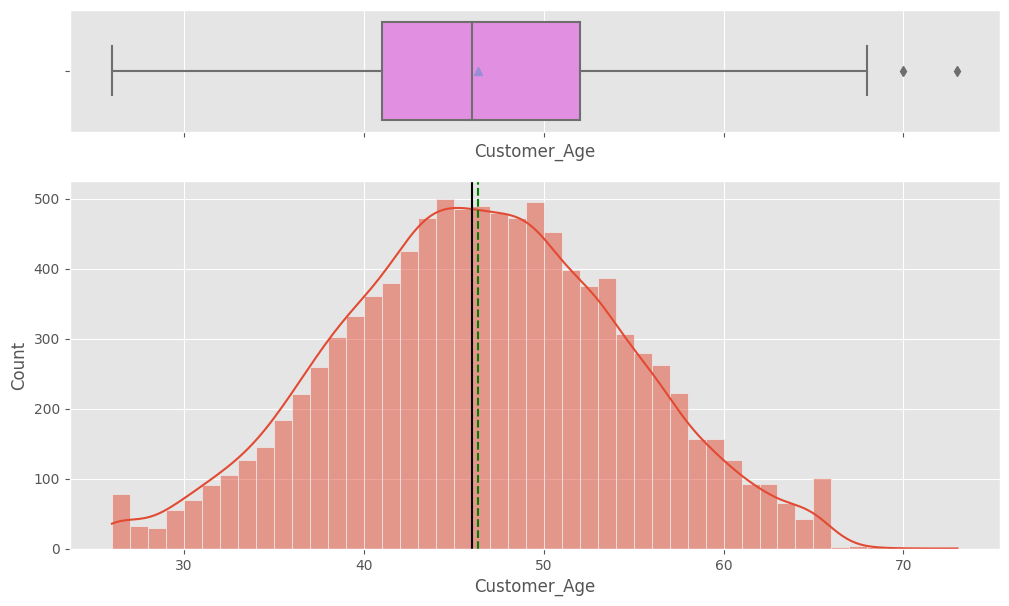

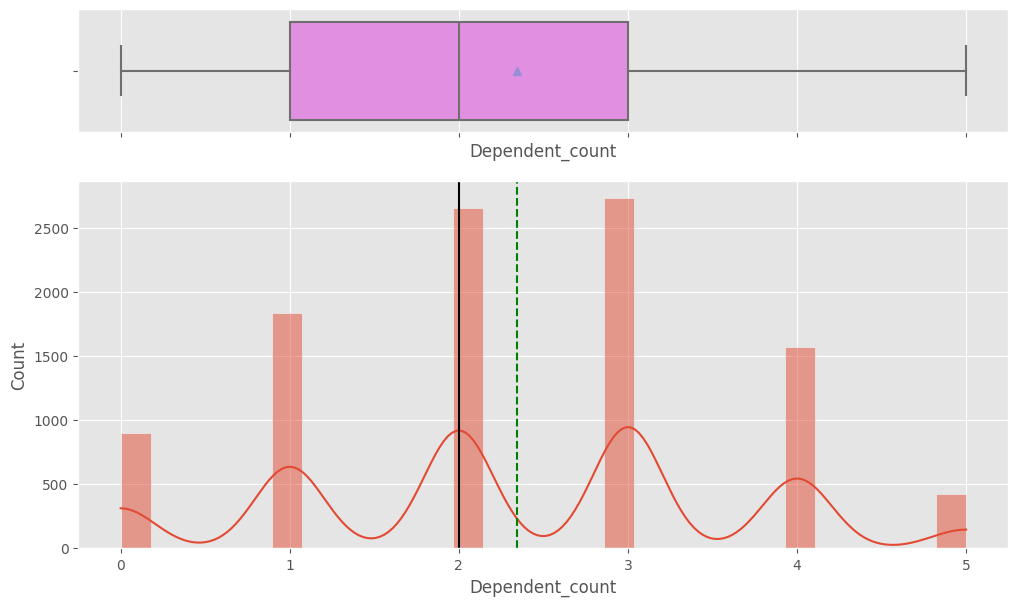

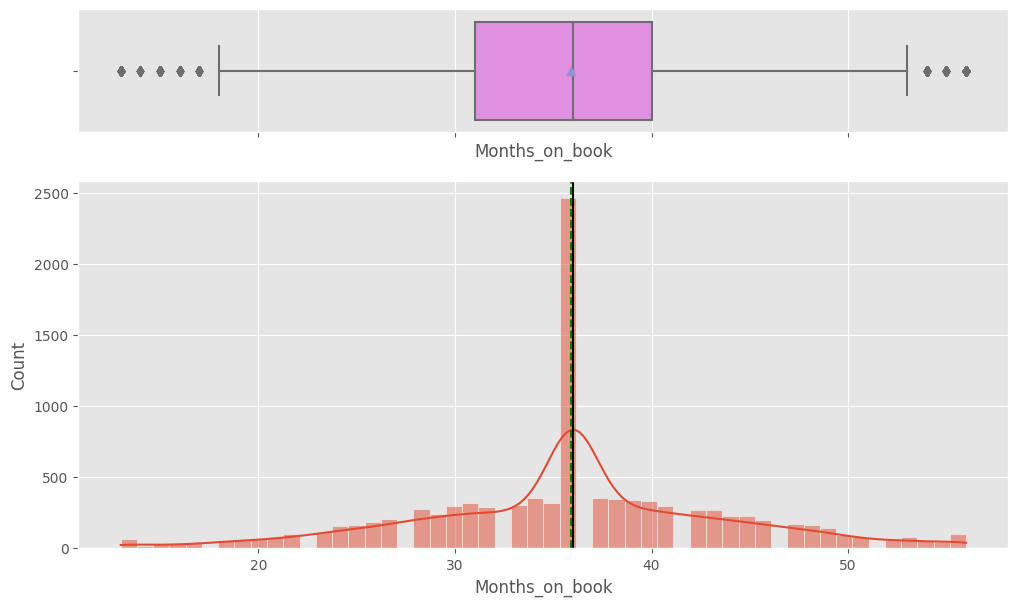

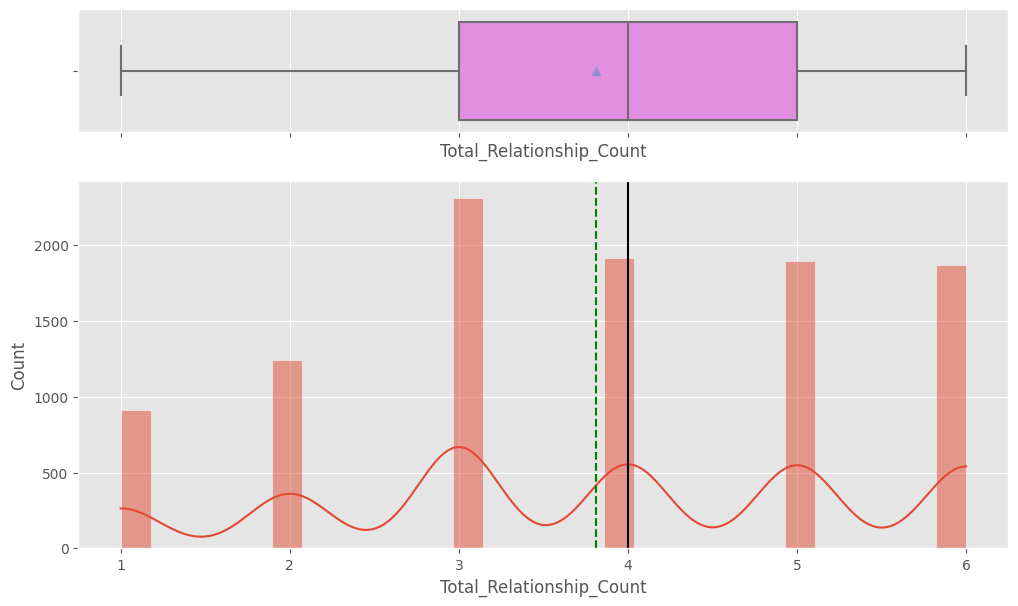

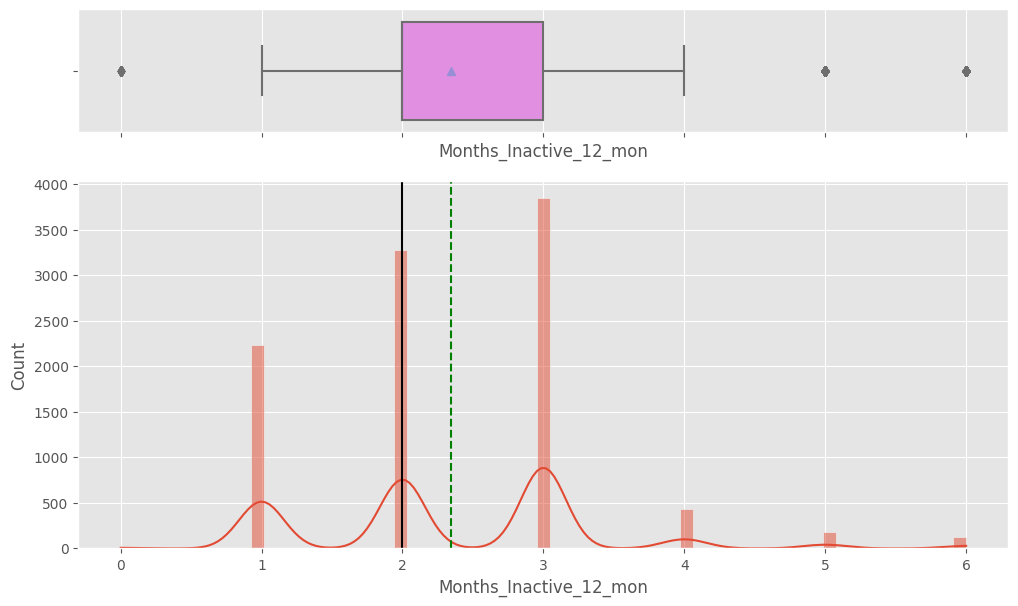

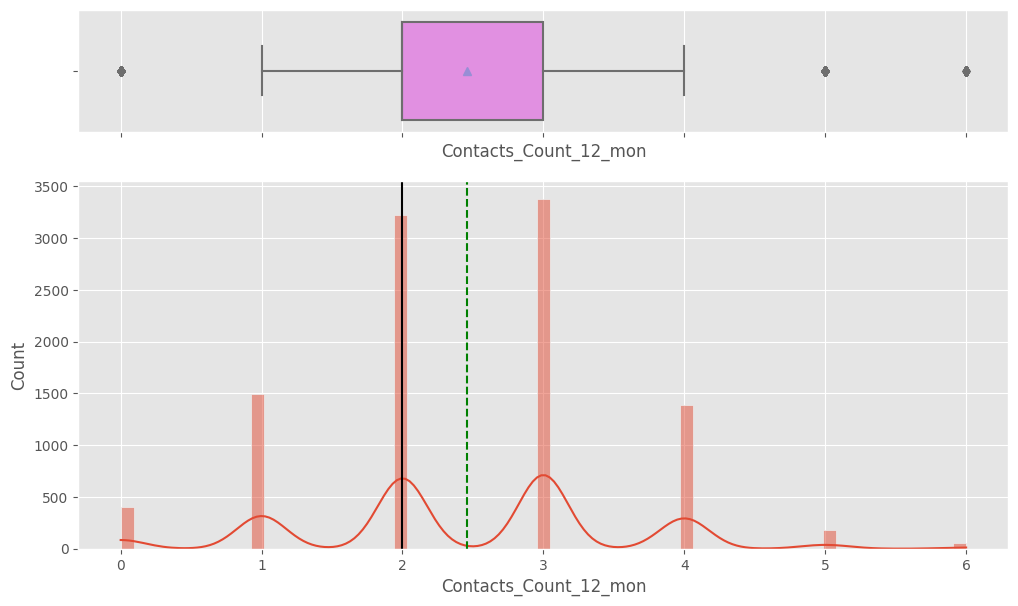

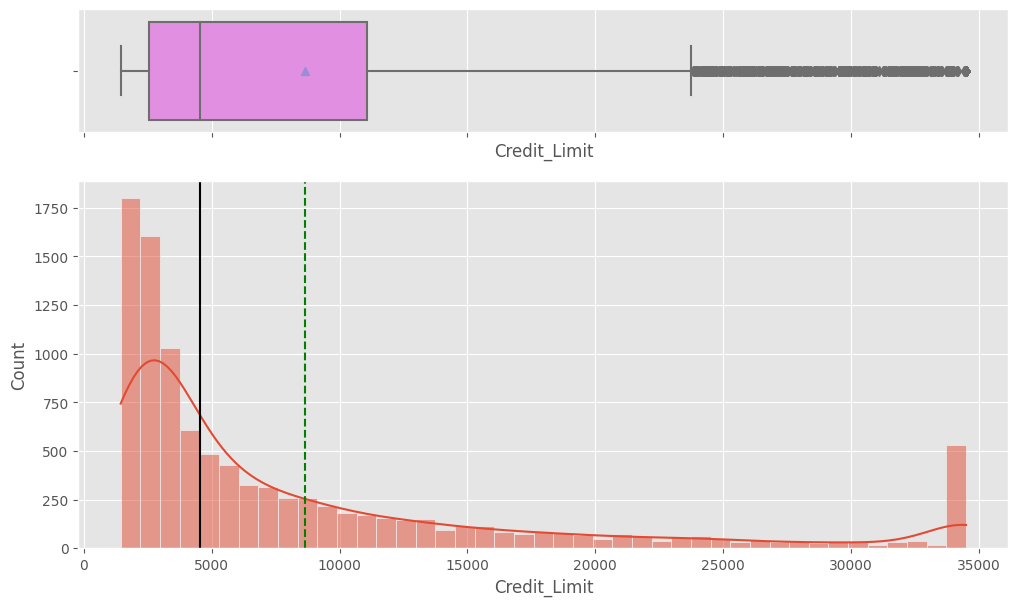

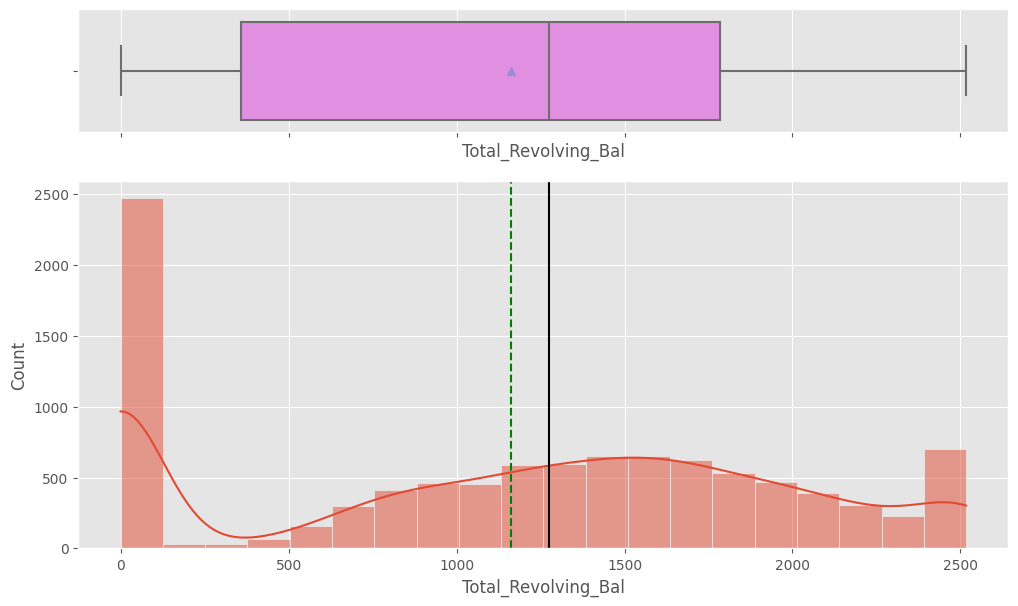

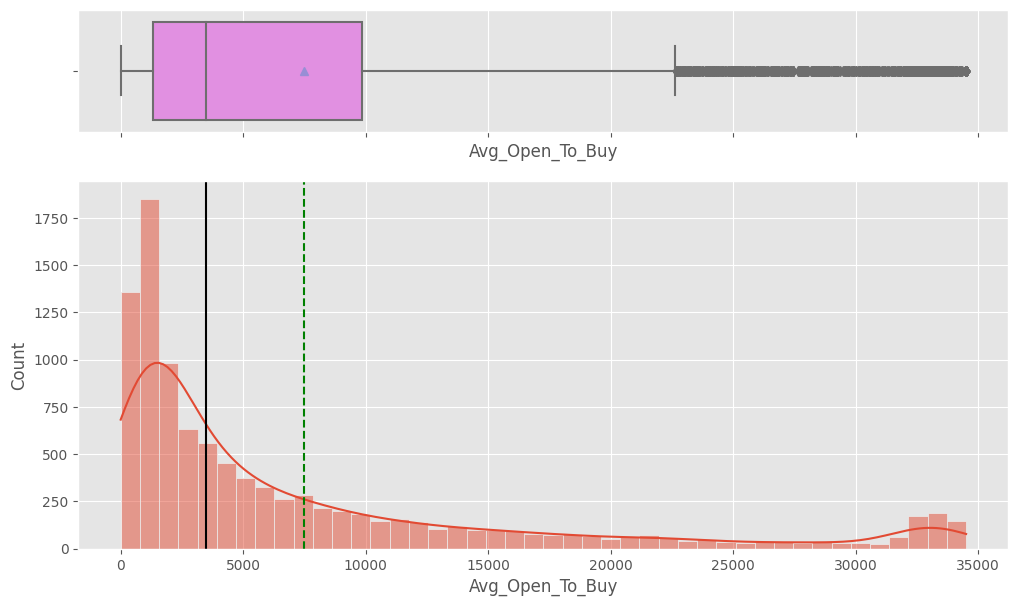

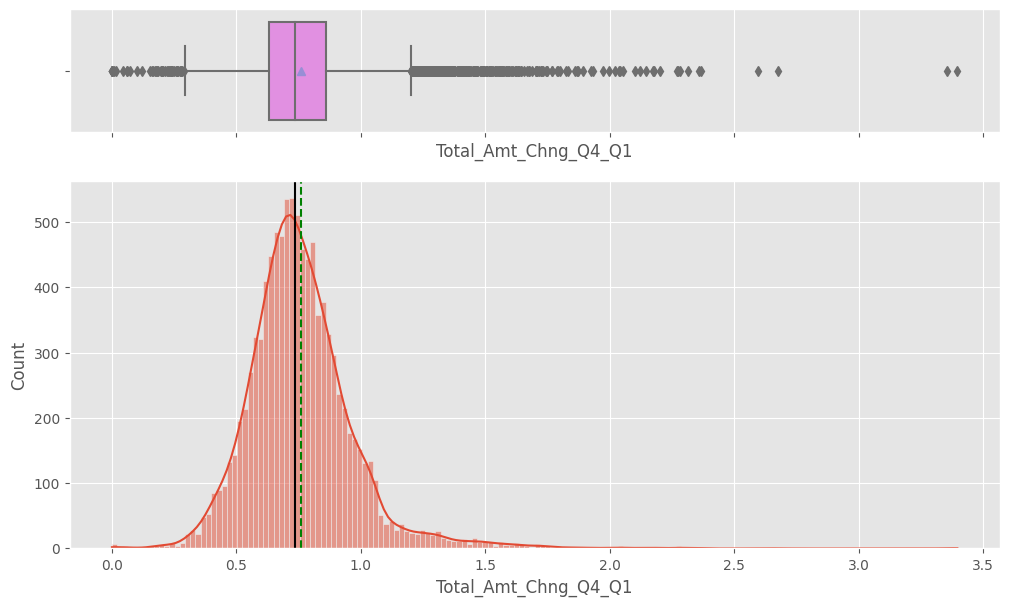

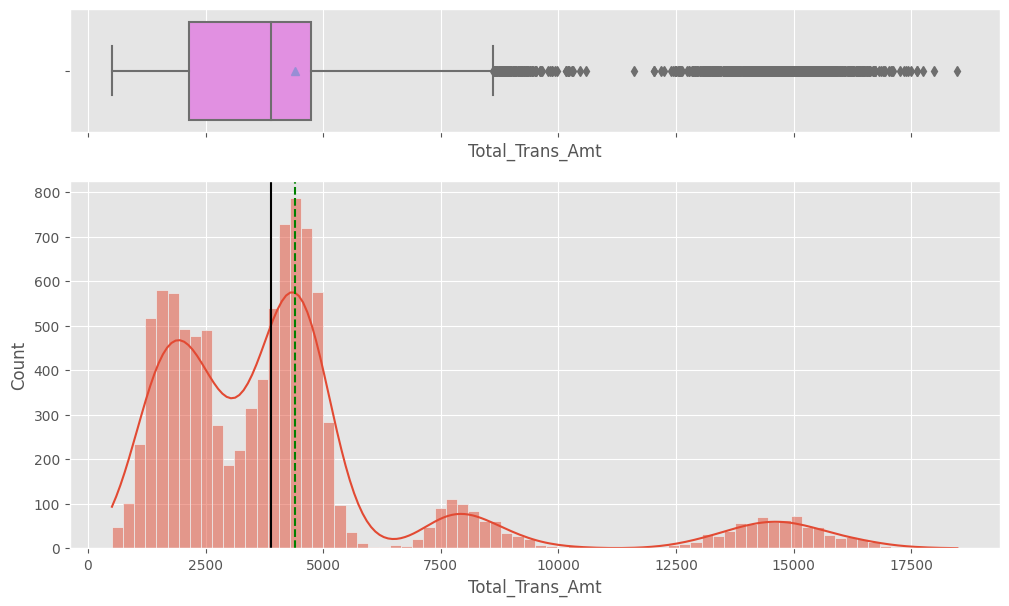

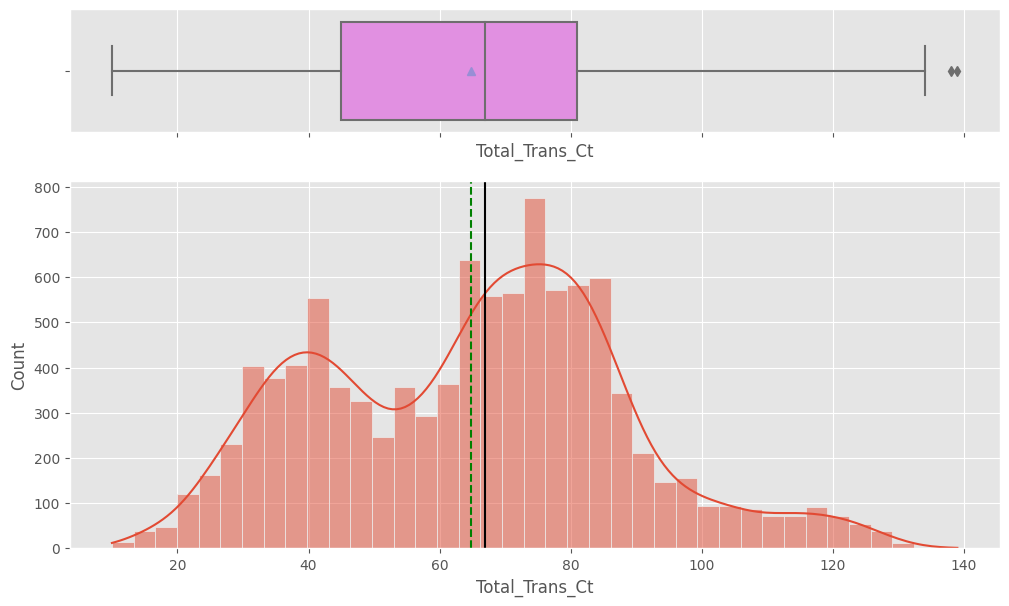

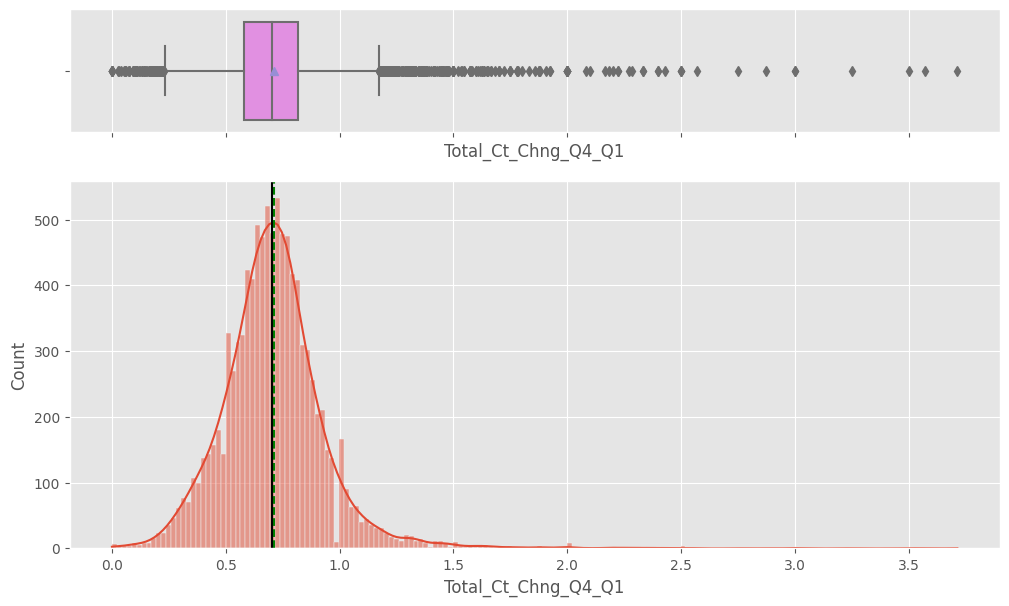

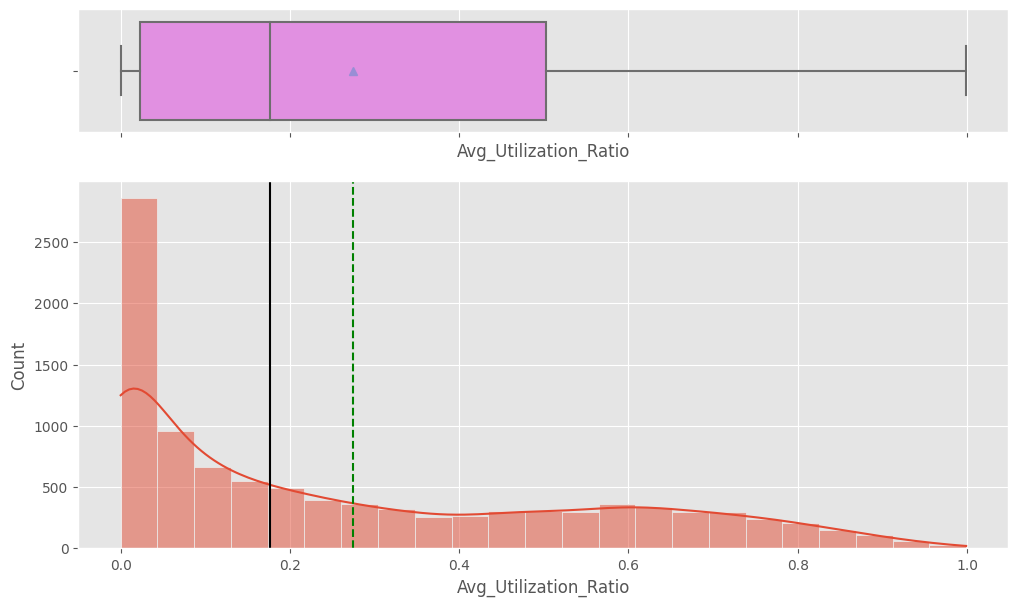

In [30]:
histogram_boxplot(data, 'Customer_Age', kde=True)
histogram_boxplot(data, 'Dependent_count', kde=True)
histogram_boxplot(data, 'Months_on_book', kde=True)
histogram_boxplot(data, 'Total_Relationship_Count', kde=True)
histogram_boxplot(data, 'Months_Inactive_12_mon', kde=True)
histogram_boxplot(data, 'Contacts_Count_12_mon', kde=True)
histogram_boxplot(data, 'Credit_Limit', kde=True)
histogram_boxplot(data, 'Total_Revolving_Bal', kde=True)
histogram_boxplot(data, 'Avg_Open_To_Buy', kde=True)
histogram_boxplot(data, 'Total_Amt_Chng_Q4_Q1', kde=True)
histogram_boxplot(data, 'Total_Trans_Amt', kde=True)
histogram_boxplot(data, 'Total_Trans_Ct', kde=True)
histogram_boxplot(data, 'Total_Ct_Chng_Q4_Q1', kde=True)
histogram_boxplot(data, 'Avg_Utilization_Ratio', kde=True)

In [31]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

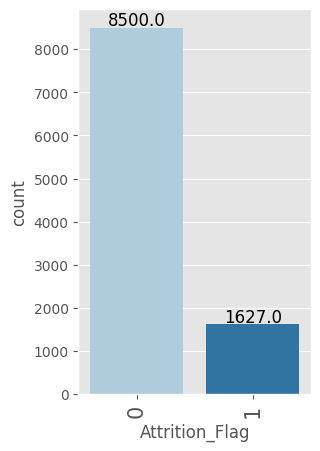

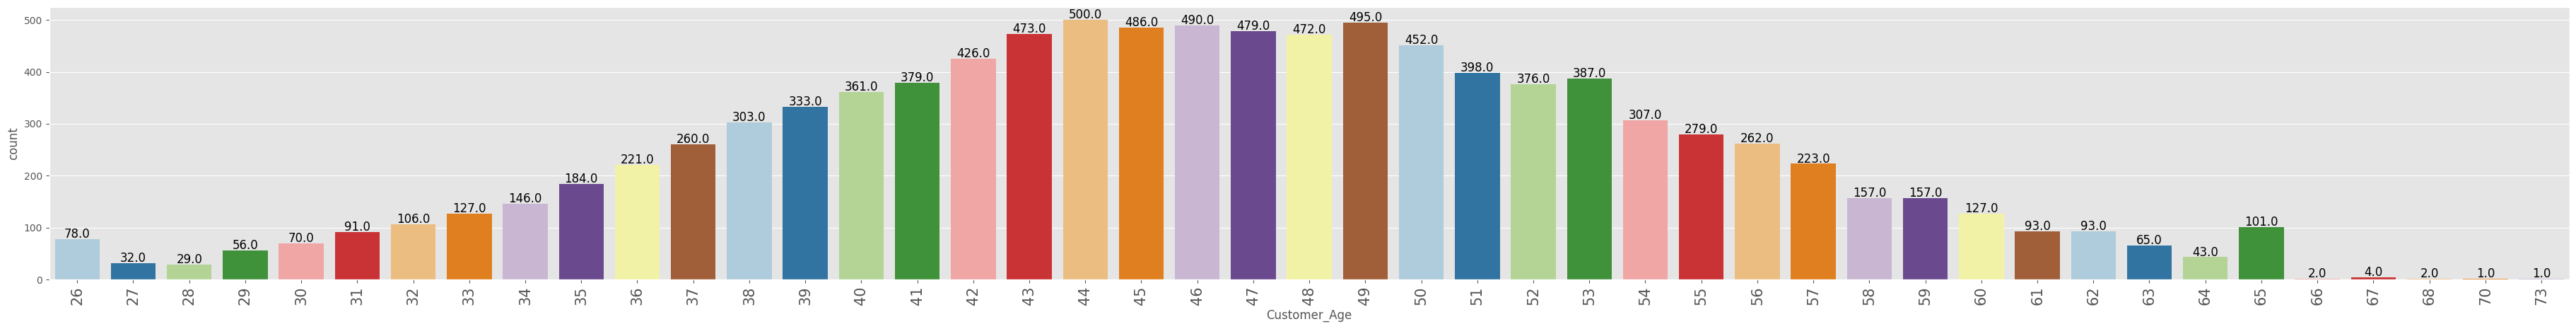

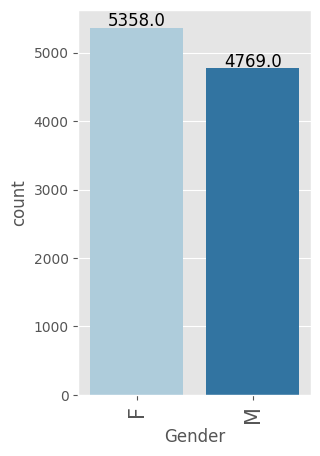

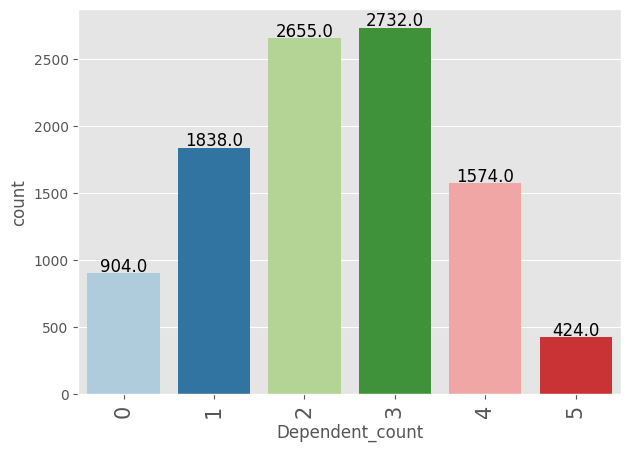

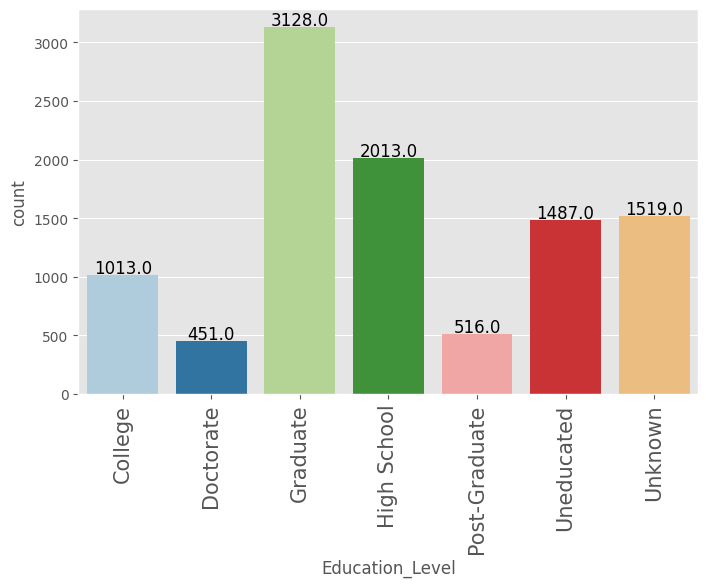

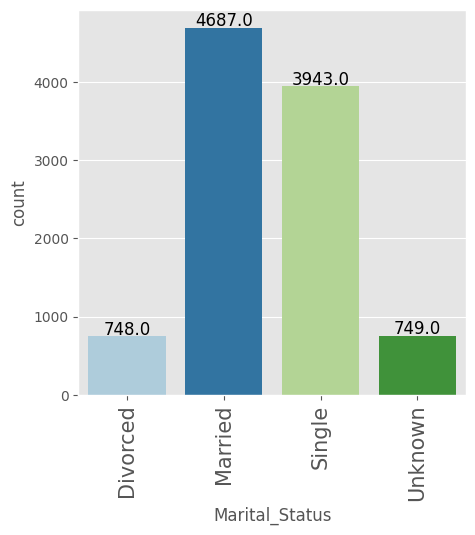

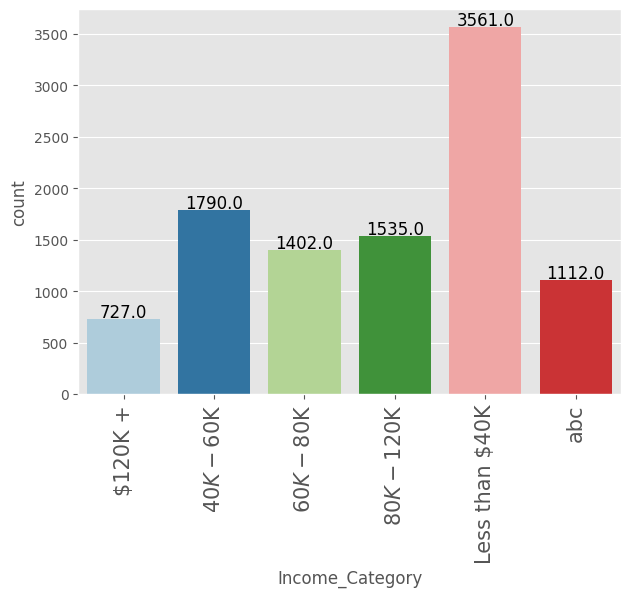

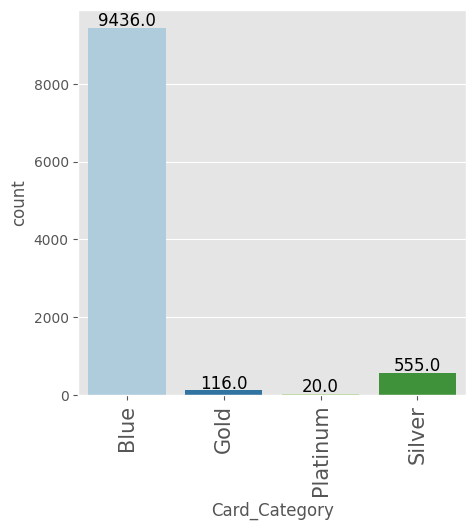

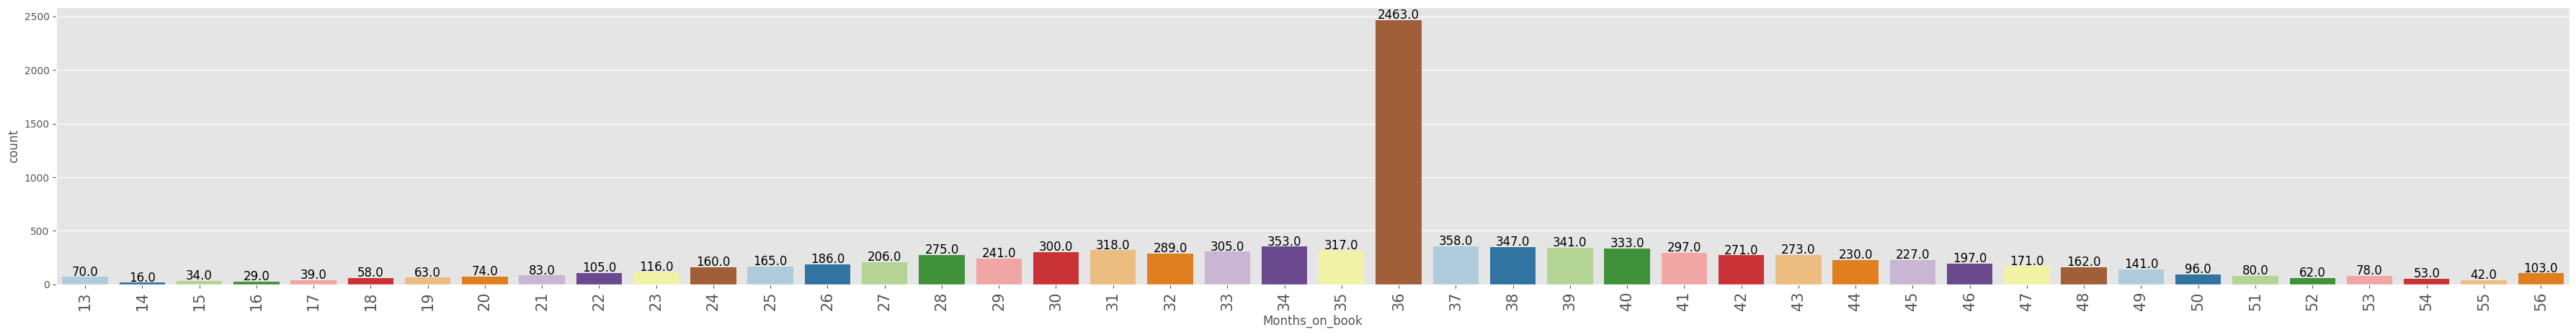

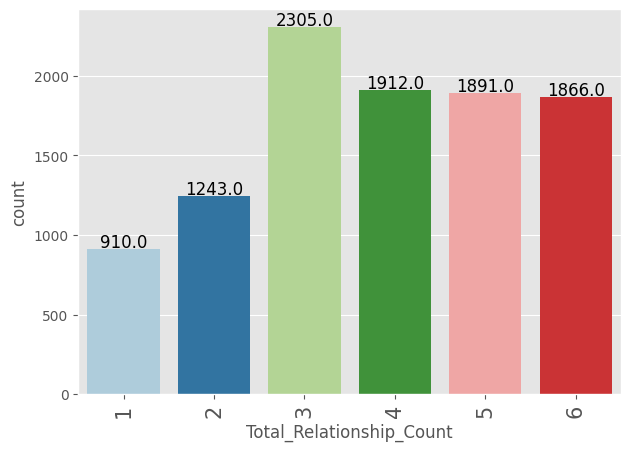

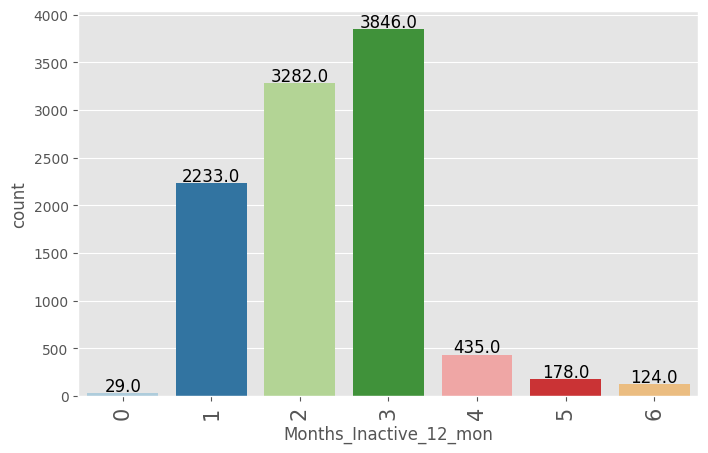

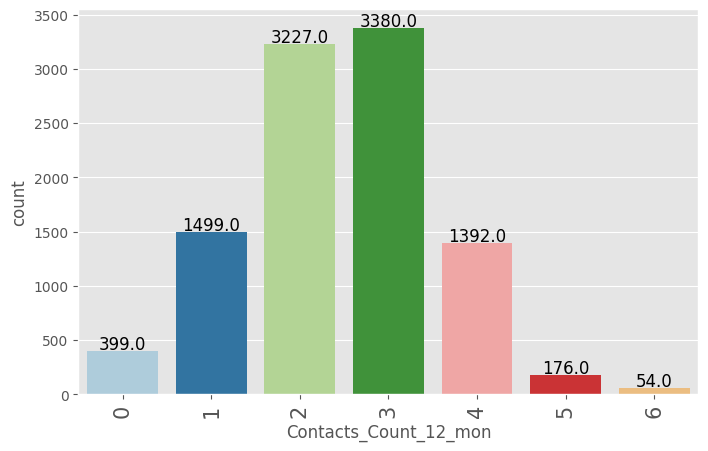

In [32]:
labeled_barplot(data, 'Attrition_Flag')
labeled_barplot(data, 'Customer_Age')
labeled_barplot(data, 'Gender')
labeled_barplot(data, 'Dependent_count')
labeled_barplot(data, 'Education_Level')
labeled_barplot(data, 'Marital_Status')
labeled_barplot(data, 'Income_Category')
labeled_barplot(data, 'Card_Category')
labeled_barplot(data, 'Months_on_book')
labeled_barplot(data, 'Total_Relationship_Count')
labeled_barplot(data, 'Months_Inactive_12_mon')
labeled_barplot(data, 'Contacts_Count_12_mon')

In [33]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag     0     1    All
Customer_Age                     
All             8500  1627  10127
43               388    85    473
48               387    85    472
44               416    84    500
46               408    82    490
45               407    79    486
49               416    79    495
47               403    76    479
41               303    76    379
50               381    71    452
54               238    69    307
40               297    64    361
42               364    62    426
53               328    59    387
52               318    58    376
51               340    58    398
55               228    51    279
39               285    48    333
38               256    47    303
56               219    43    262
59               117    40    157
37               223    37    260
57               190    33    223
58               133    24    157
36               197    24    221
35               163    21    184
33               107    20    127
34            

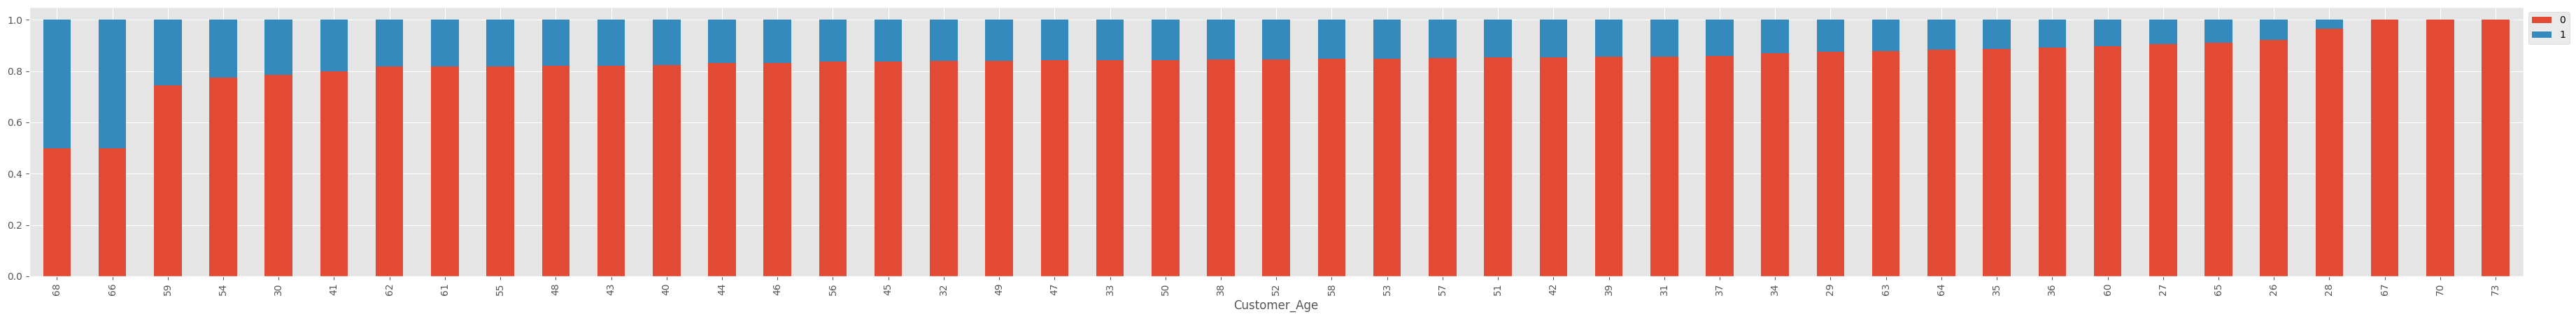

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


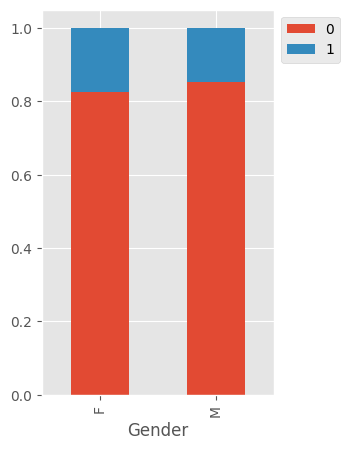

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


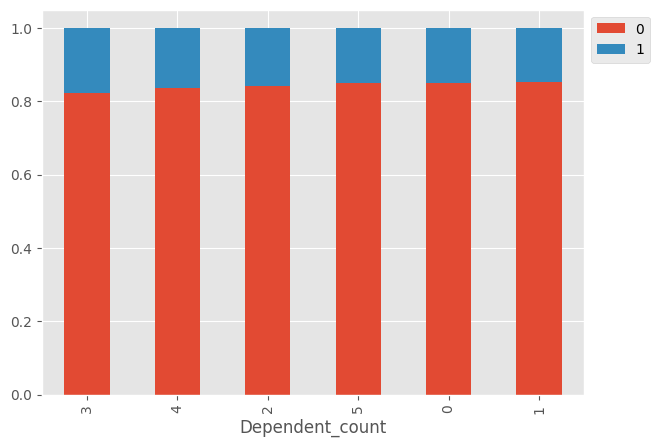

Attrition_Flag      0     1    All
Education_Level                   
All              8500  1627  10127
Graduate         2641   487   3128
High School      1707   306   2013
Unknown          1263   256   1519
Uneducated       1250   237   1487
College           859   154   1013
Doctorate         356    95    451
Post-Graduate     424    92    516
------------------------------------------------------------------------------------------------------------------------


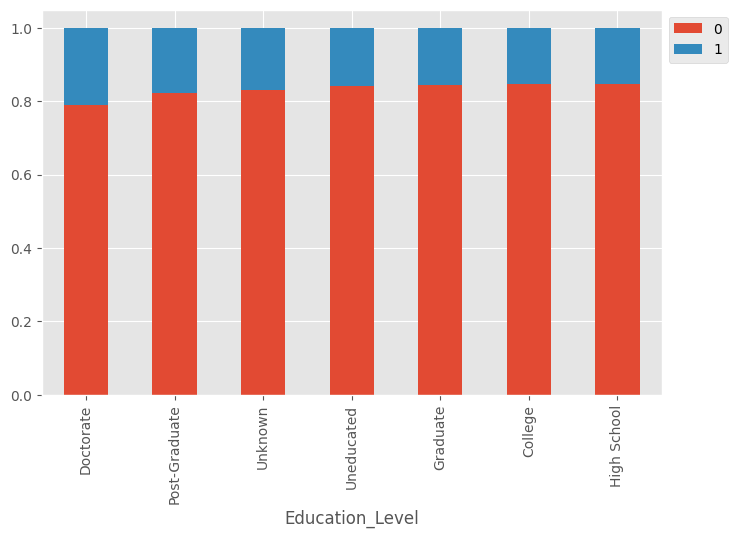

Attrition_Flag     0     1    All
Marital_Status                   
All             8500  1627  10127
Married         3978   709   4687
Single          3275   668   3943
Unknown          620   129    749
Divorced         627   121    748
------------------------------------------------------------------------------------------------------------------------


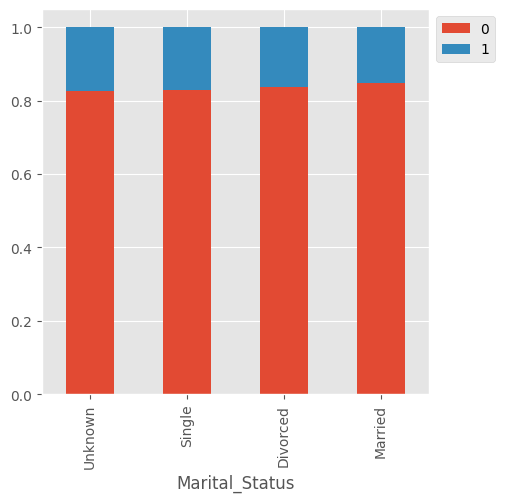

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


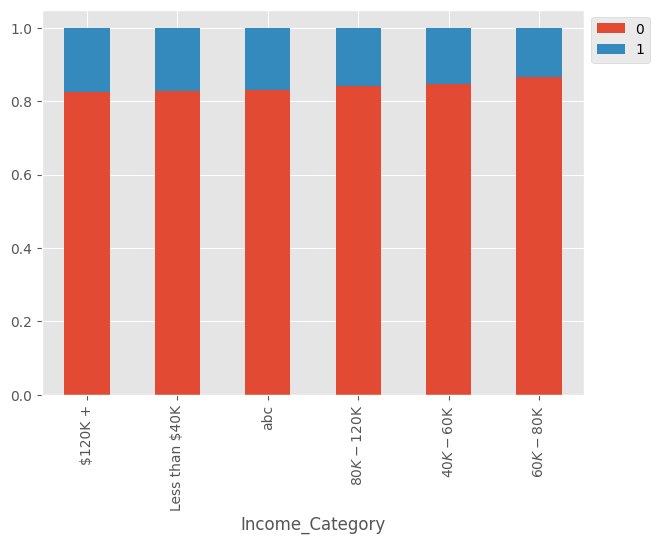

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


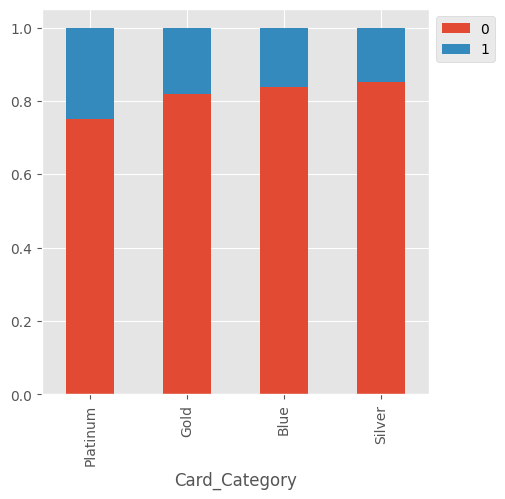

Attrition_Flag     0     1    All
Months_on_book                   
All             8500  1627  10127
36              2033   430   2463
39               277    64    341
37               296    62    358
30               242    58    300
38               290    57    347
34               296    57    353
41               246    51    297
33               257    48    305
40               288    45    333
35               272    45    317
32               245    44    289
28               232    43    275
44               188    42    230
43               231    42    273
46               161    36    197
42               235    36    271
29               207    34    241
31               284    34    318
45               194    33    227
25               134    31    165
24               132    28    160
48               135    27    162
50                71    25     96
49               117    24    141
26               162    24    186
47               147    24    171
27            

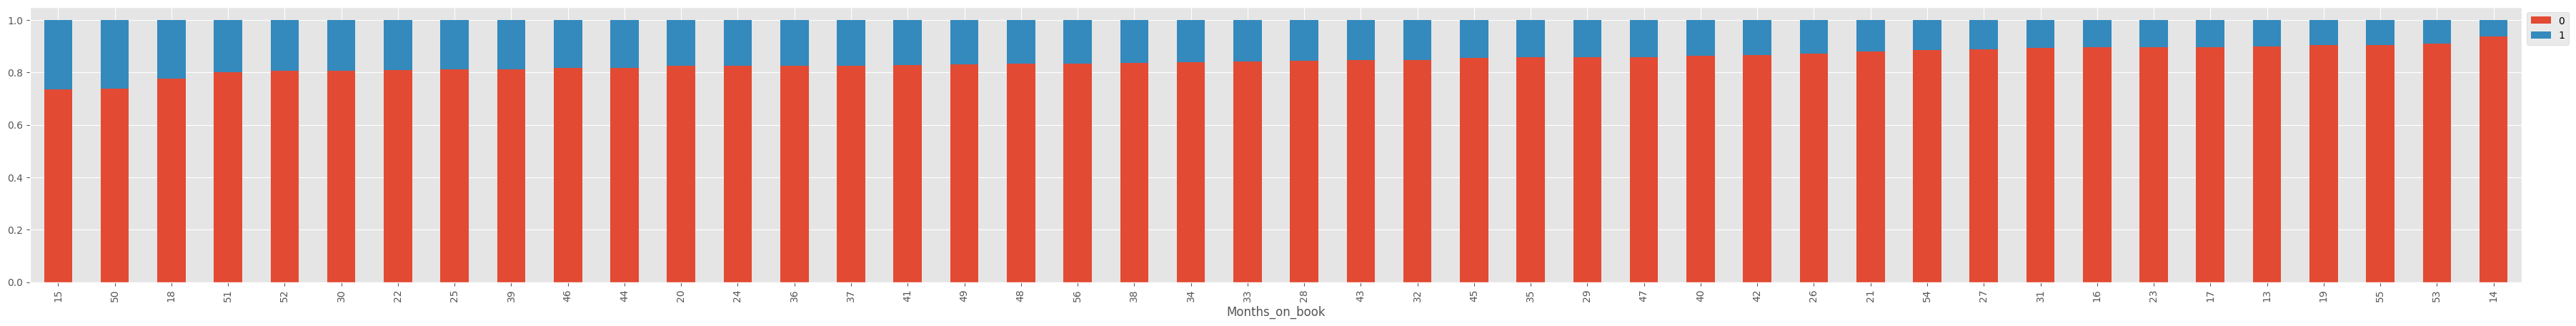

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


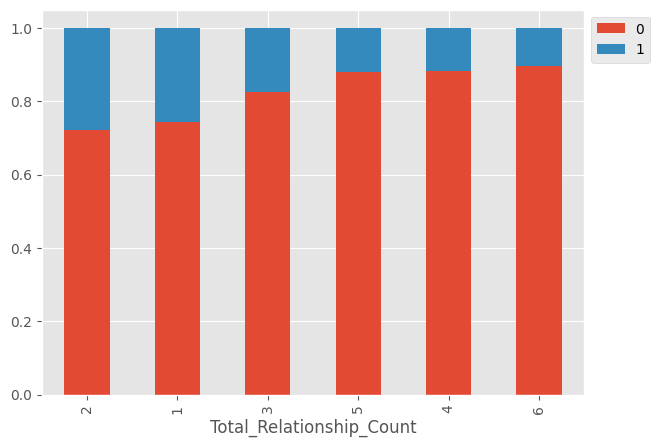

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


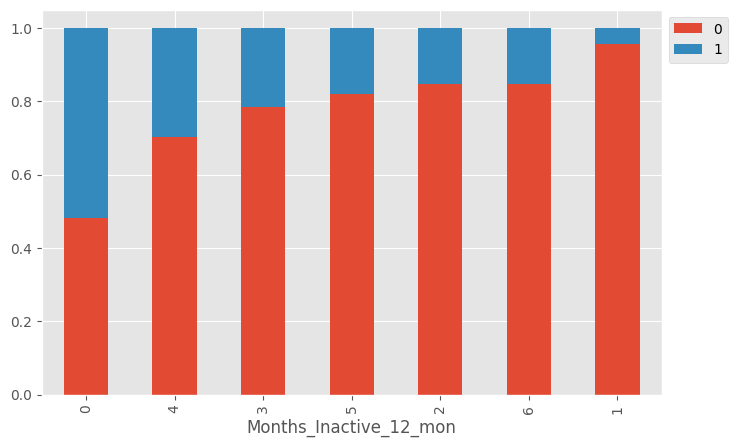

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


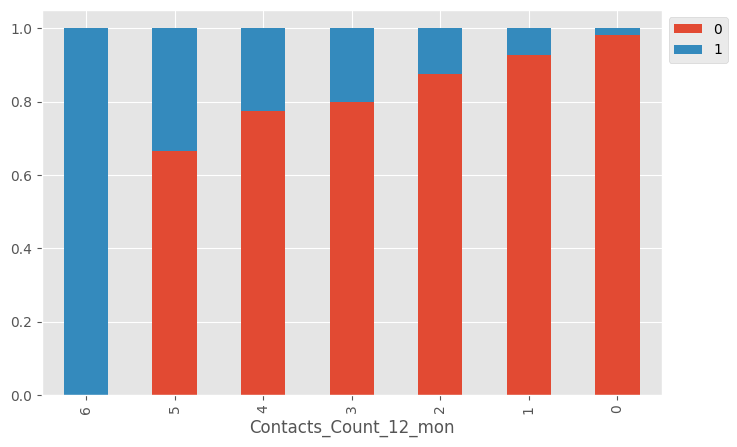

In [34]:
stacked_barplot(data, 'Customer_Age', 'Attrition_Flag')
stacked_barplot(data, 'Gender', 'Attrition_Flag')
stacked_barplot(data, 'Dependent_count', 'Attrition_Flag')
stacked_barplot(data, 'Education_Level', 'Attrition_Flag')
stacked_barplot(data, 'Marital_Status', 'Attrition_Flag')
stacked_barplot(data, 'Income_Category', 'Attrition_Flag')
stacked_barplot(data, 'Card_Category', 'Attrition_Flag')
stacked_barplot(data, 'Months_on_book', 'Attrition_Flag')
stacked_barplot(data, 'Total_Relationship_Count', 'Attrition_Flag')
stacked_barplot(data, 'Months_Inactive_12_mon', 'Attrition_Flag')
stacked_barplot(data, 'Contacts_Count_12_mon', 'Attrition_Flag')

In [35]:
# function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

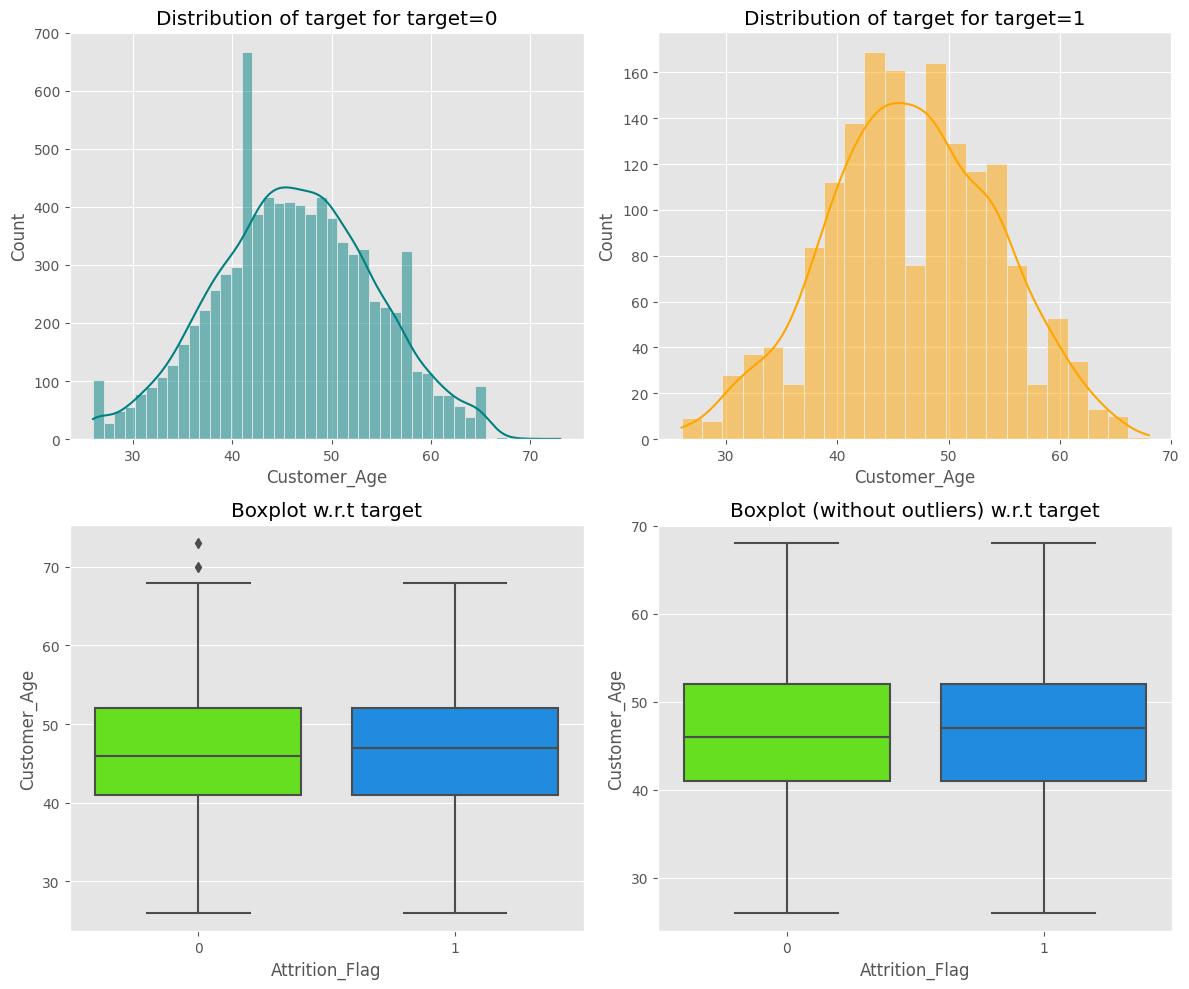

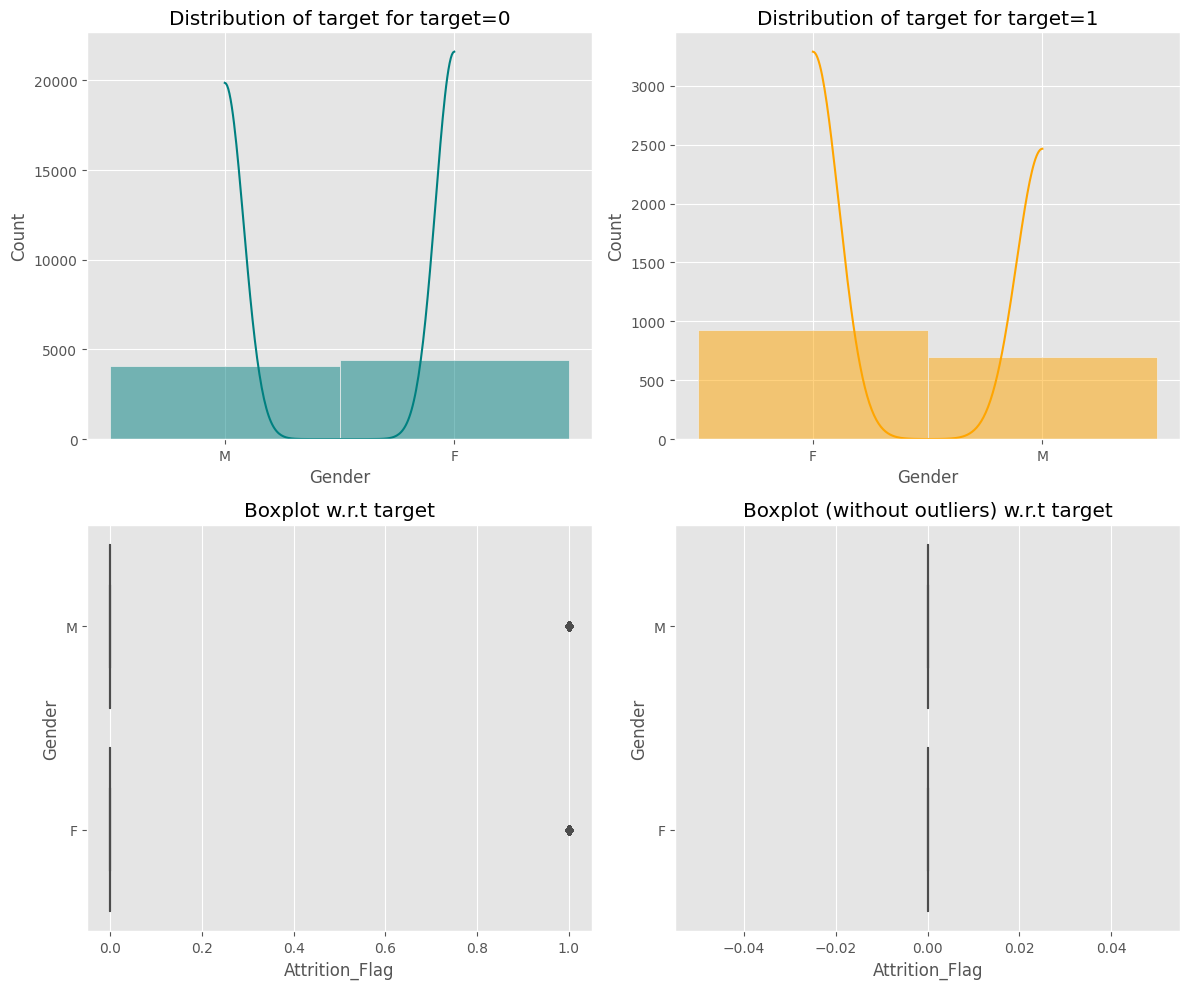

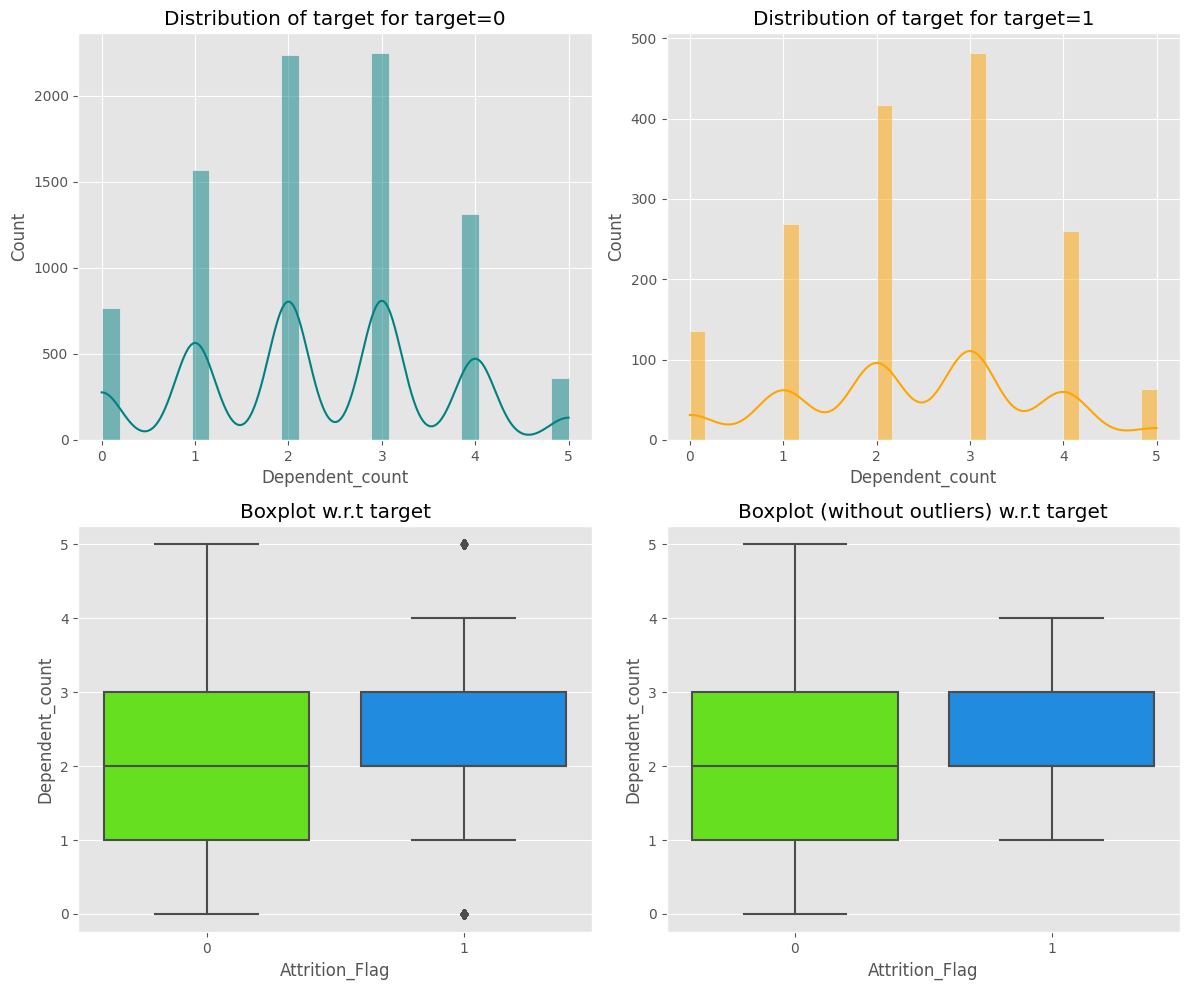

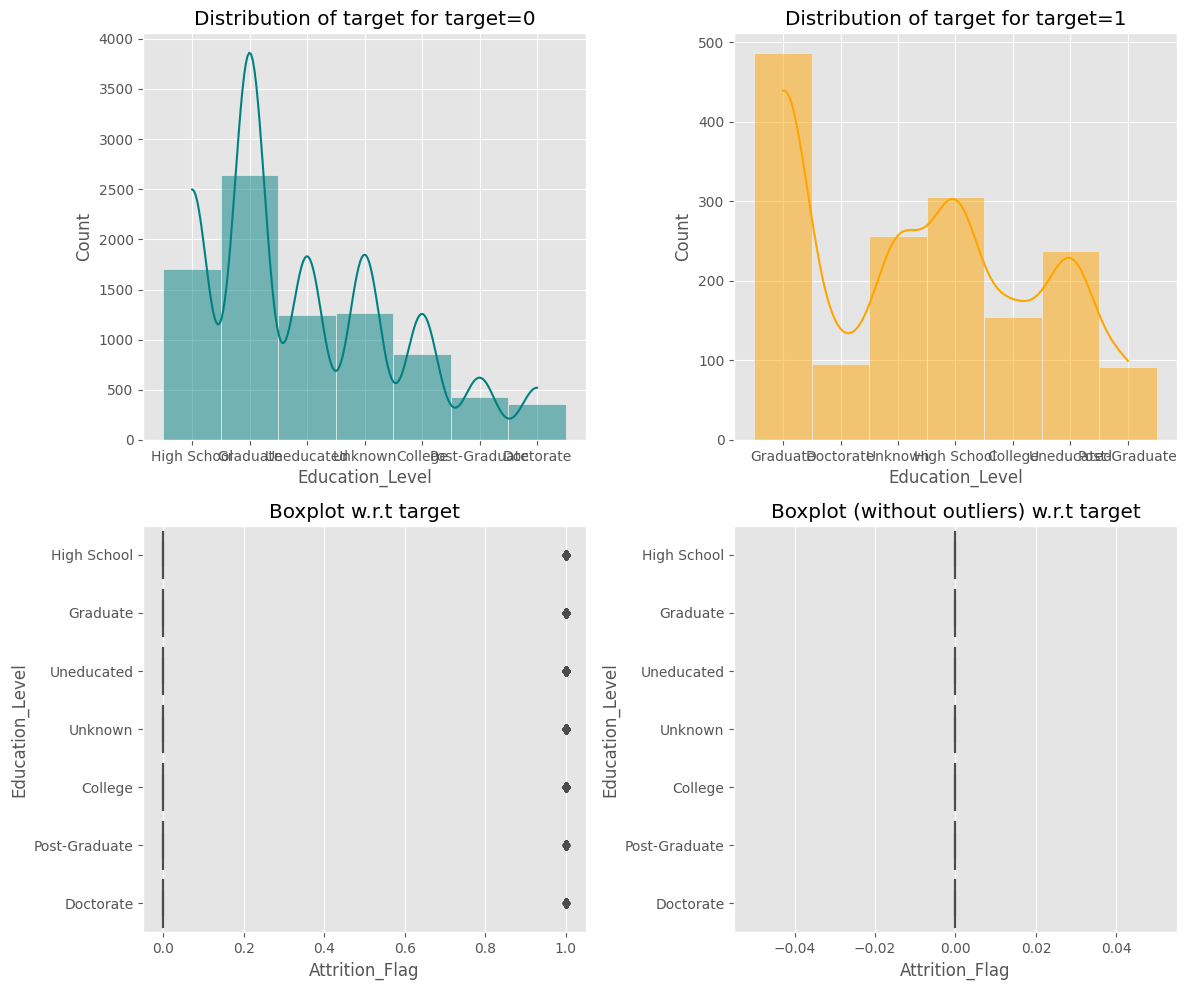

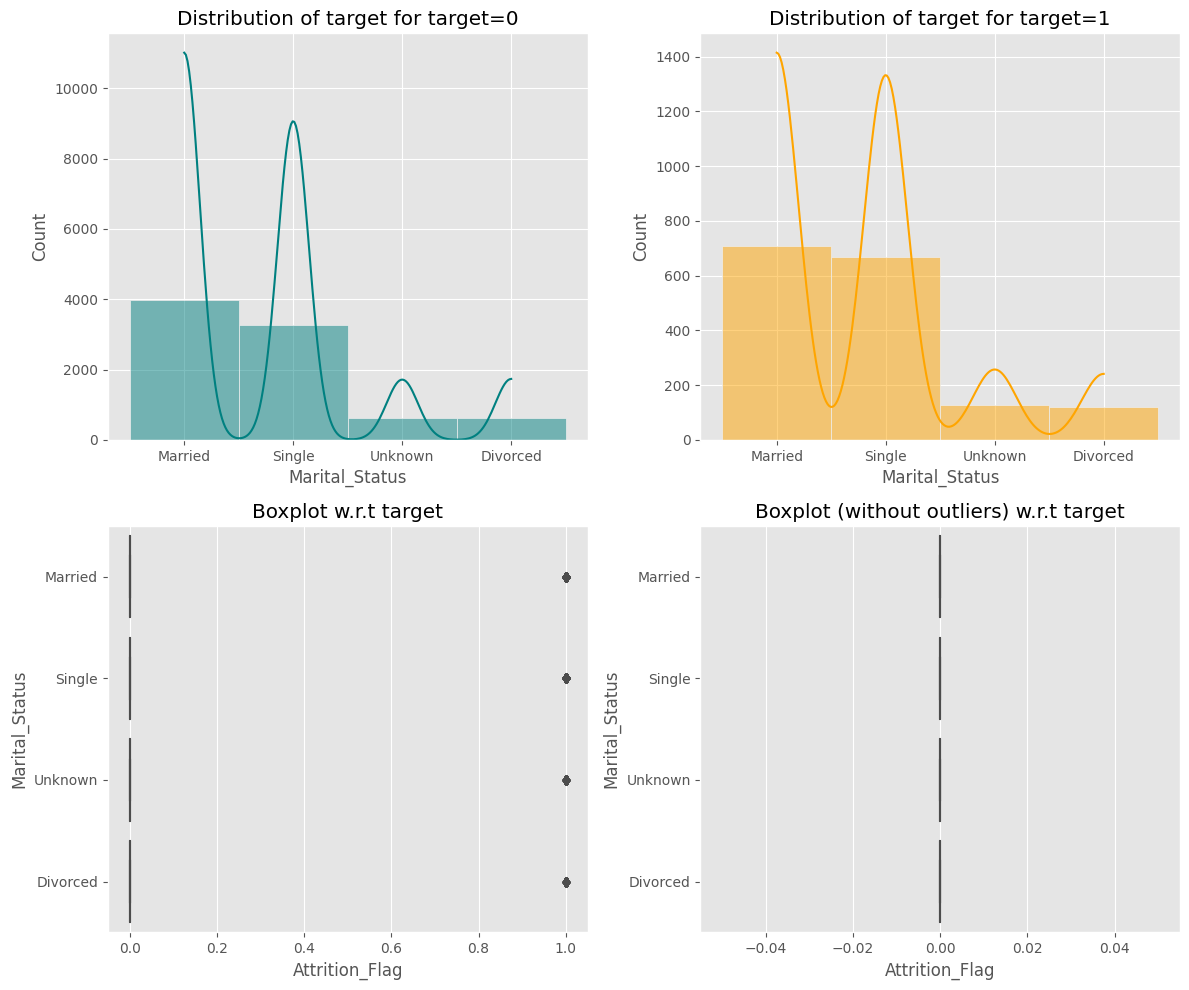

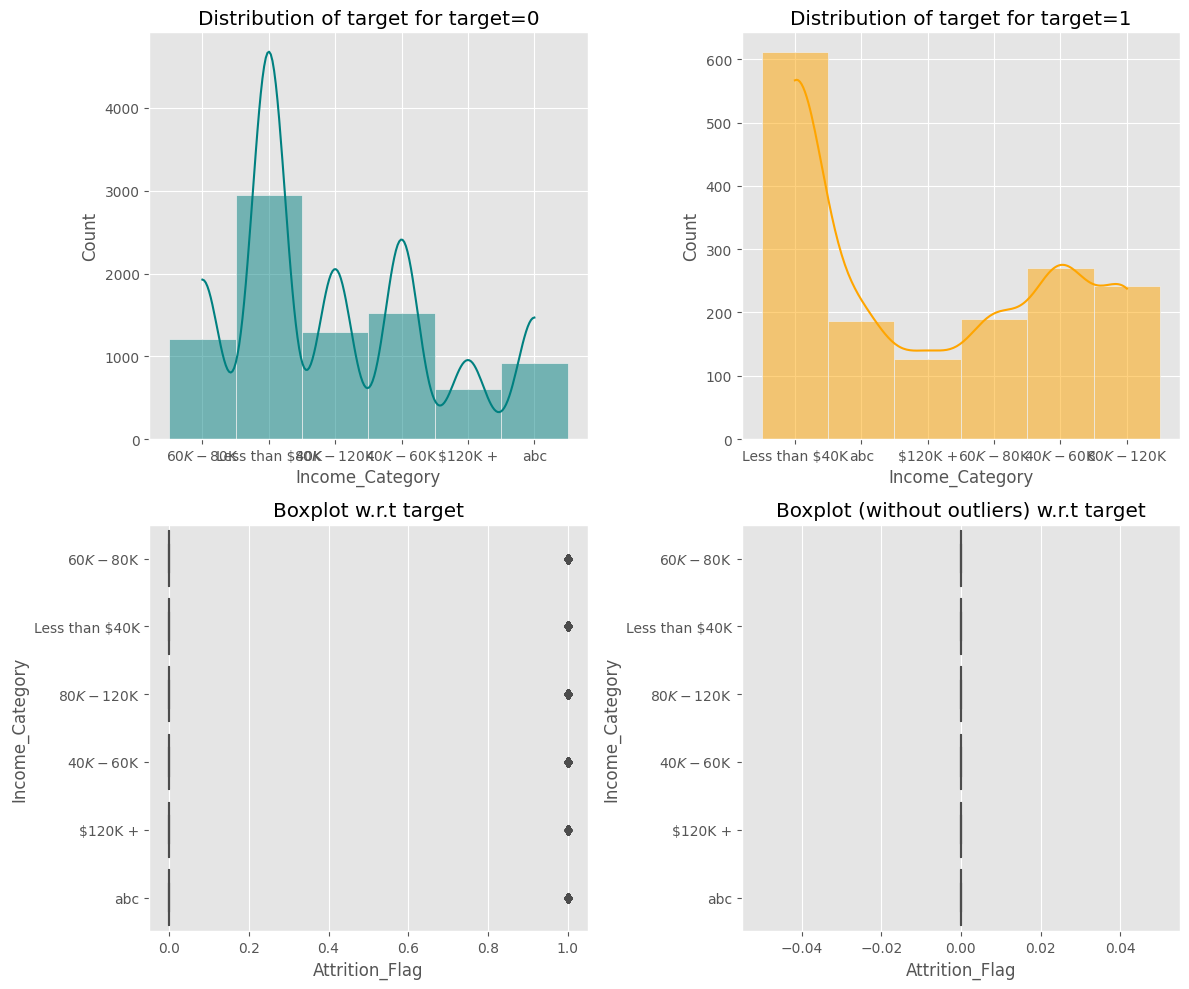

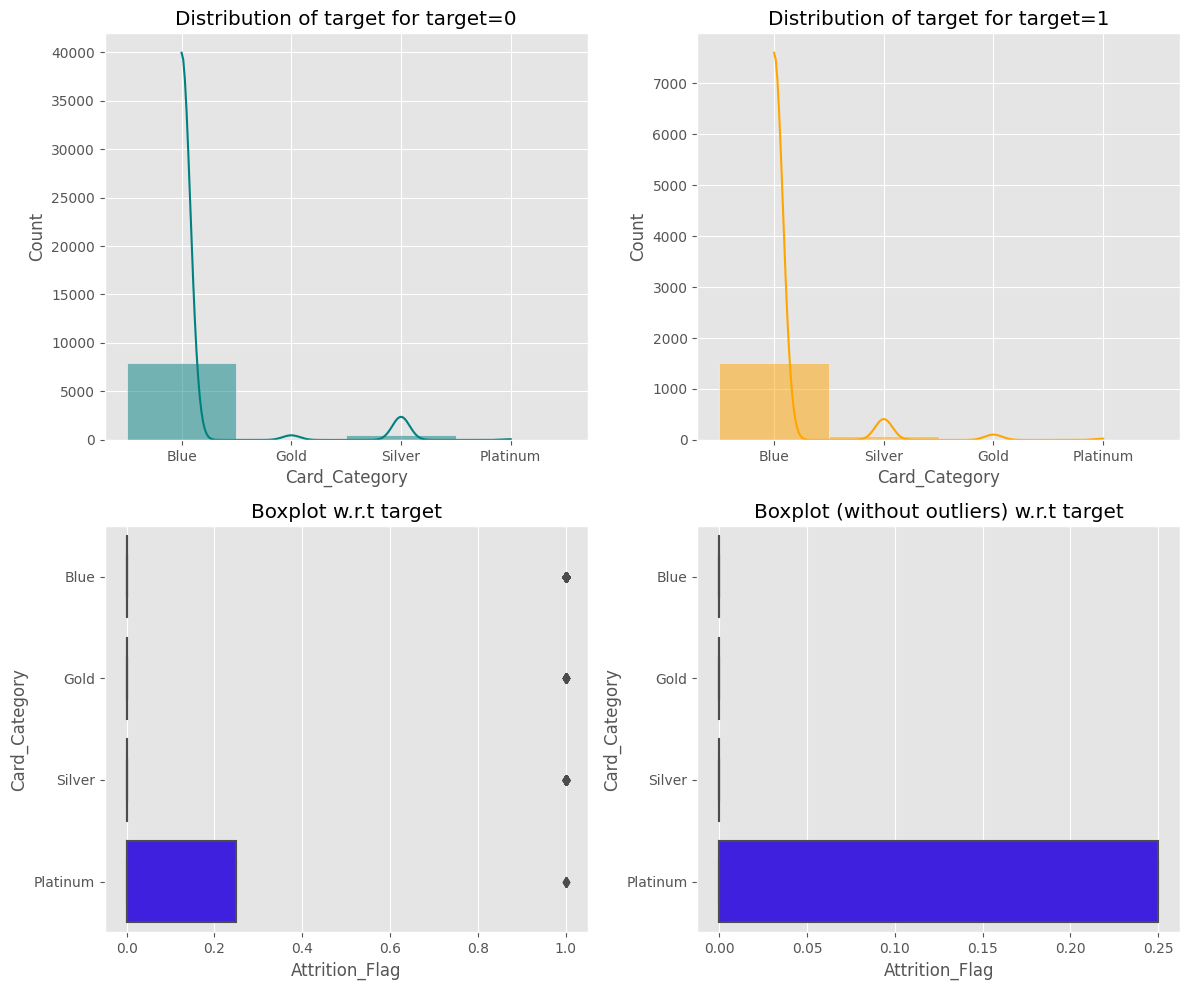

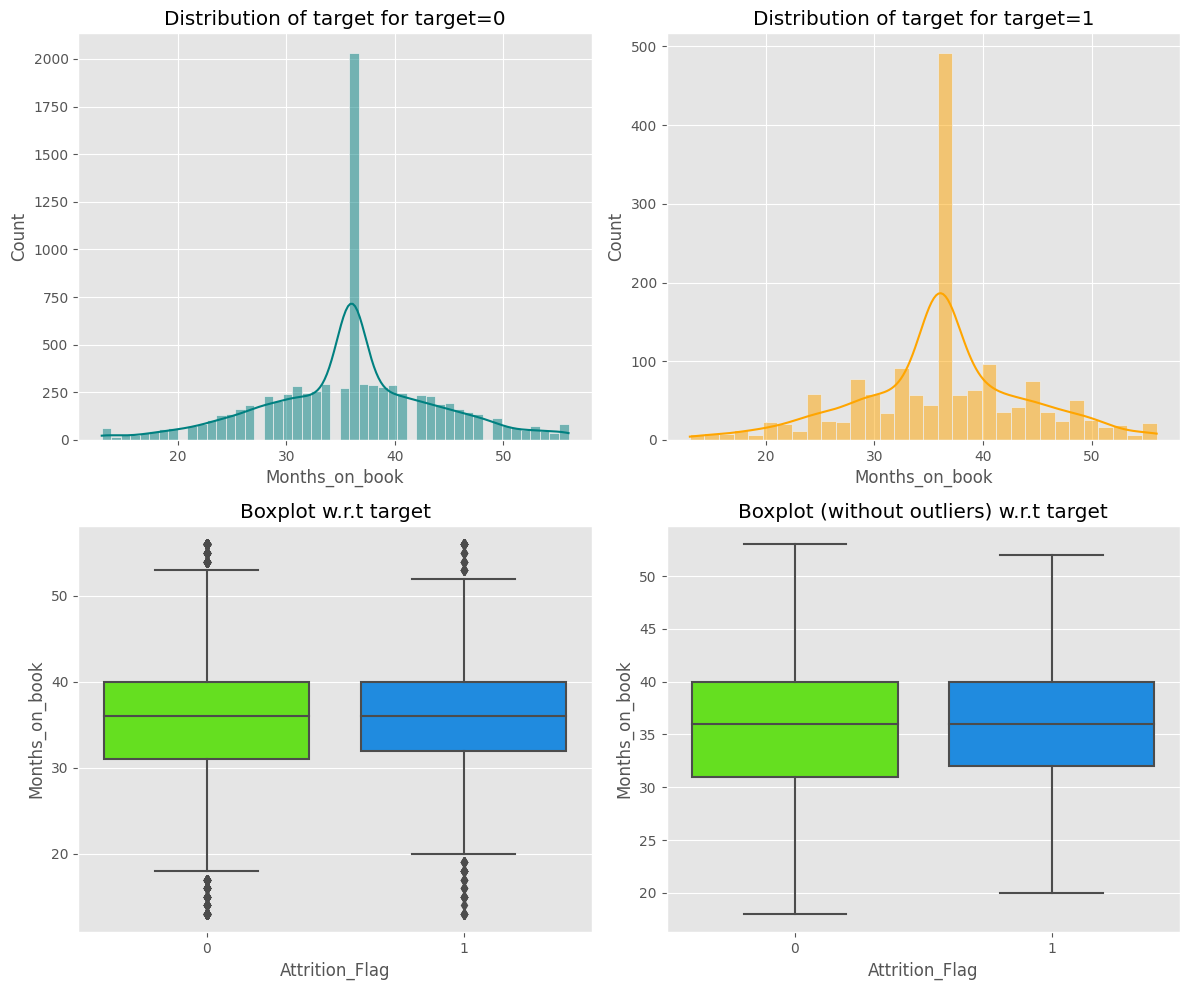

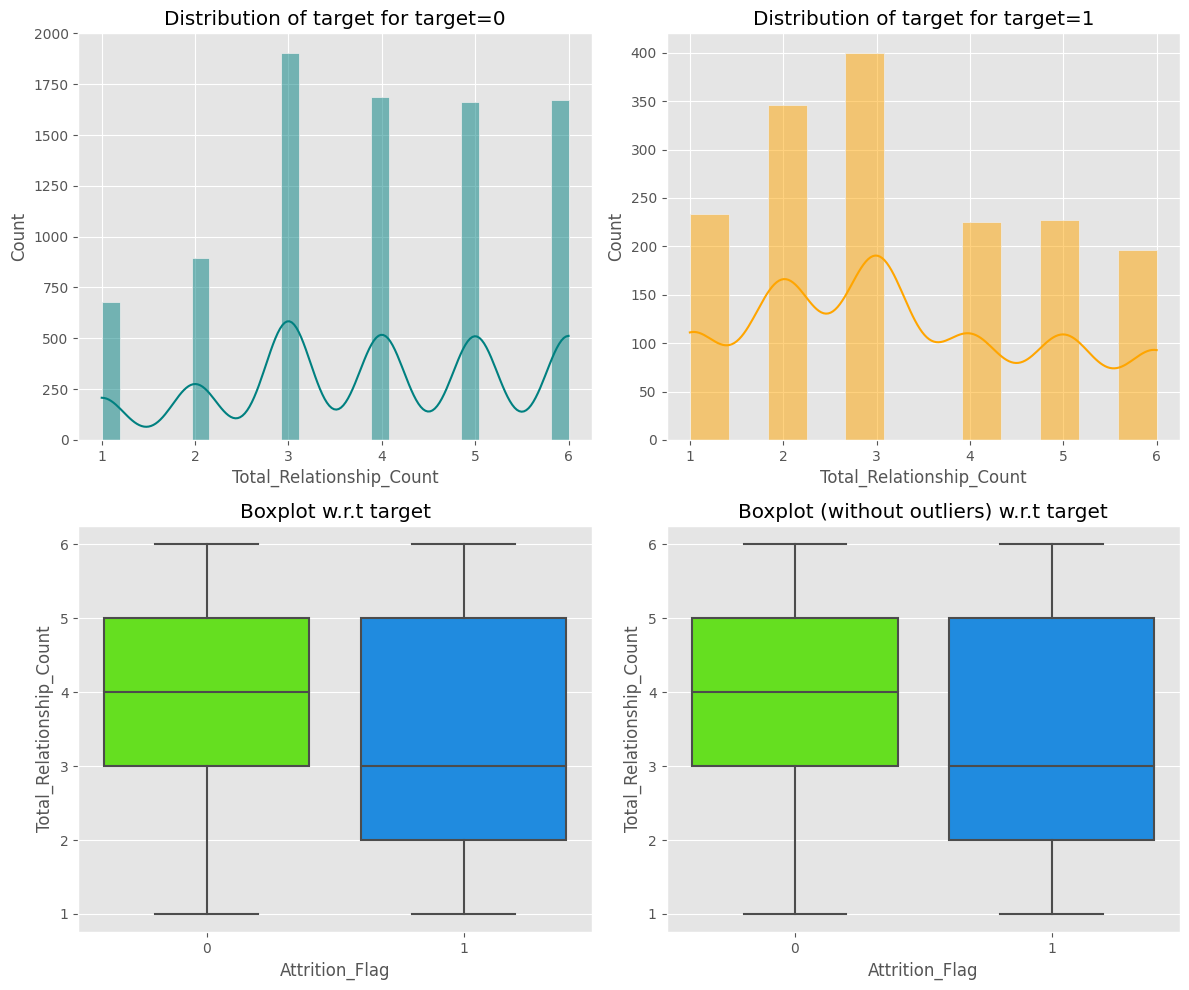

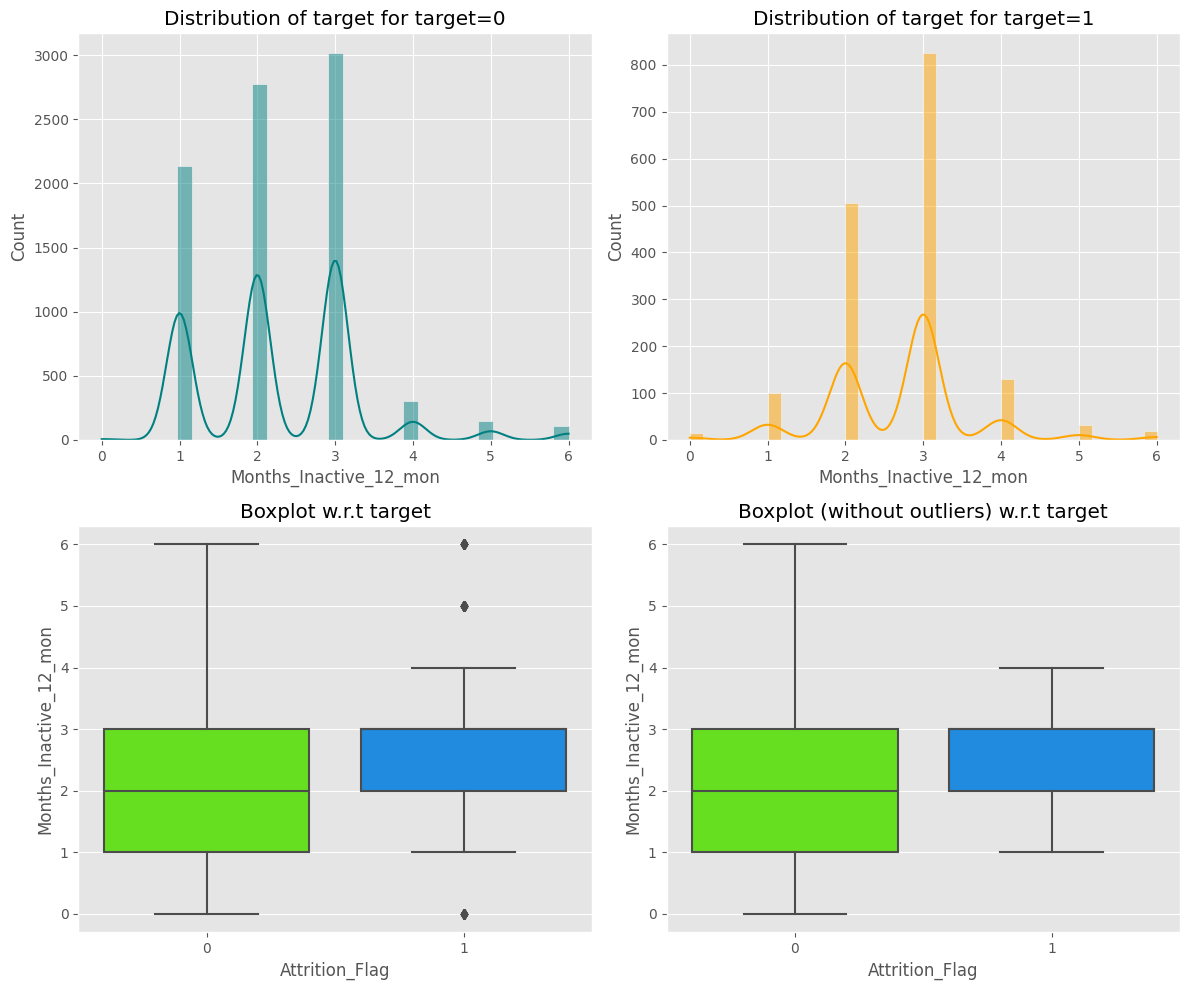

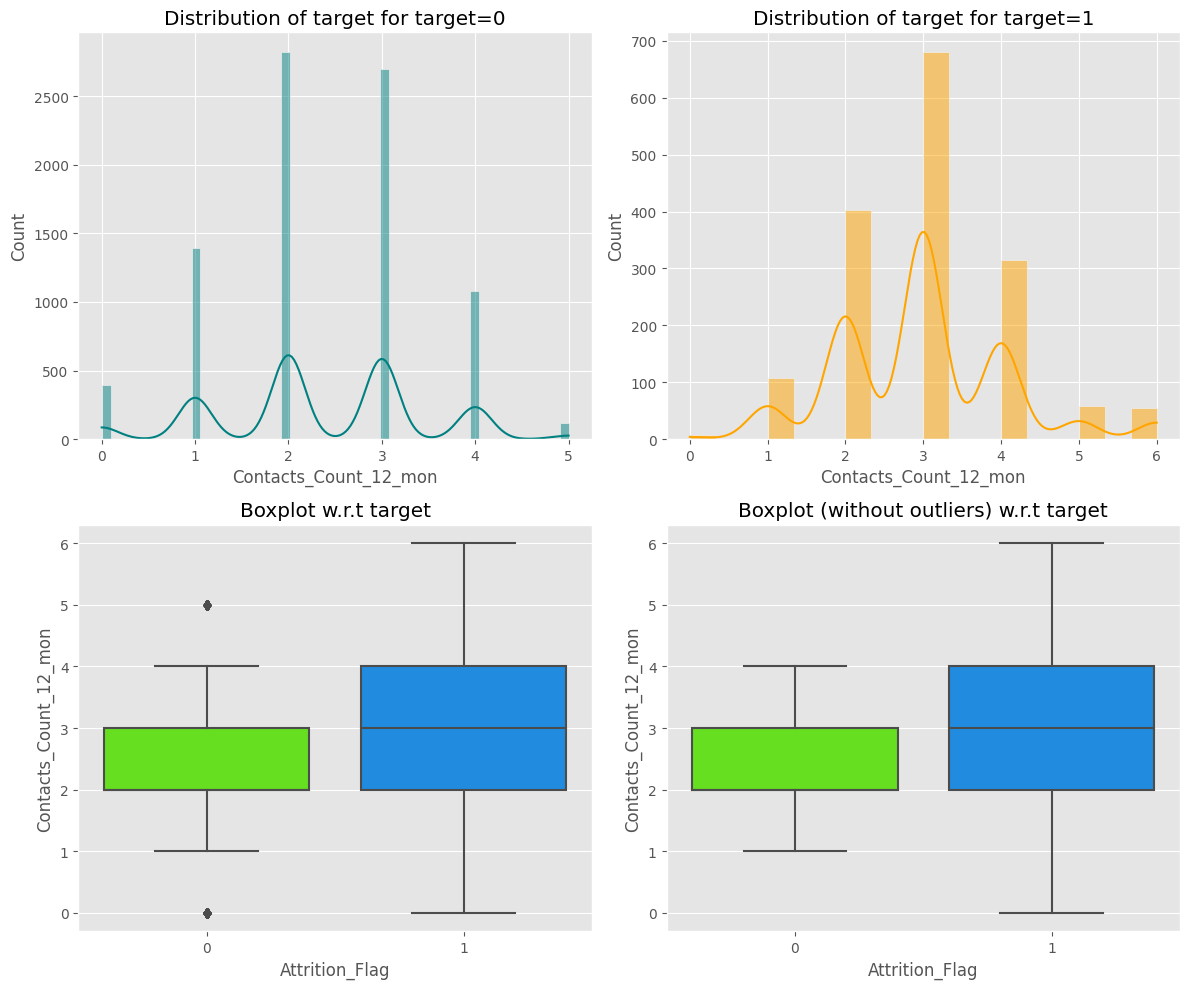

In [36]:
distribution_plot_wrt_target(data, 'Customer_Age', 'Attrition_Flag')
distribution_plot_wrt_target(data, 'Gender', 'Attrition_Flag')
distribution_plot_wrt_target(data, 'Dependent_count', 'Attrition_Flag')
distribution_plot_wrt_target(data, 'Education_Level', 'Attrition_Flag')
distribution_plot_wrt_target(data, 'Marital_Status', 'Attrition_Flag')
distribution_plot_wrt_target(data, 'Income_Category', 'Attrition_Flag')
distribution_plot_wrt_target(data, 'Card_Category', 'Attrition_Flag')
distribution_plot_wrt_target(data, 'Months_on_book', 'Attrition_Flag')
distribution_plot_wrt_target(data, 'Total_Relationship_Count', 'Attrition_Flag')
distribution_plot_wrt_target(data, 'Months_Inactive_12_mon', 'Attrition_Flag')
distribution_plot_wrt_target(data, 'Contacts_Count_12_mon', 'Attrition_Flag')


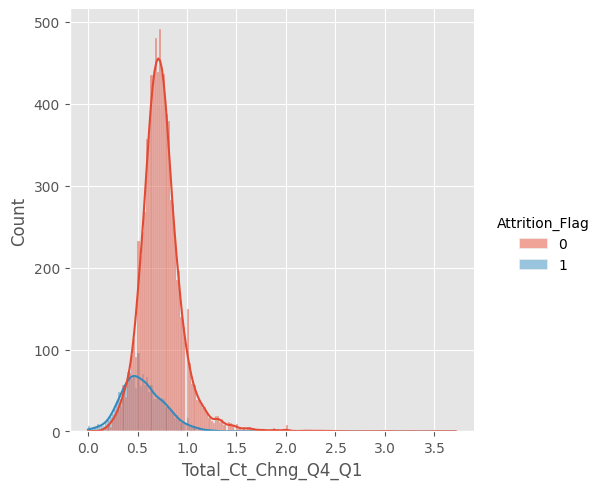

In [31]:
# Question 4
sns.displot(data = data, x='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag', kde=True)
plt.show()

In [37]:
# Question 4
# correlations between the numerical features
plt.figure(figsize=(20, 20))
sns.set(palette = 'nipy_spectral')
sns.pairplot(data = data, hue = 'Attrition_Flag', corner = True)

Output hidden; open in https://colab.research.google.com to view.

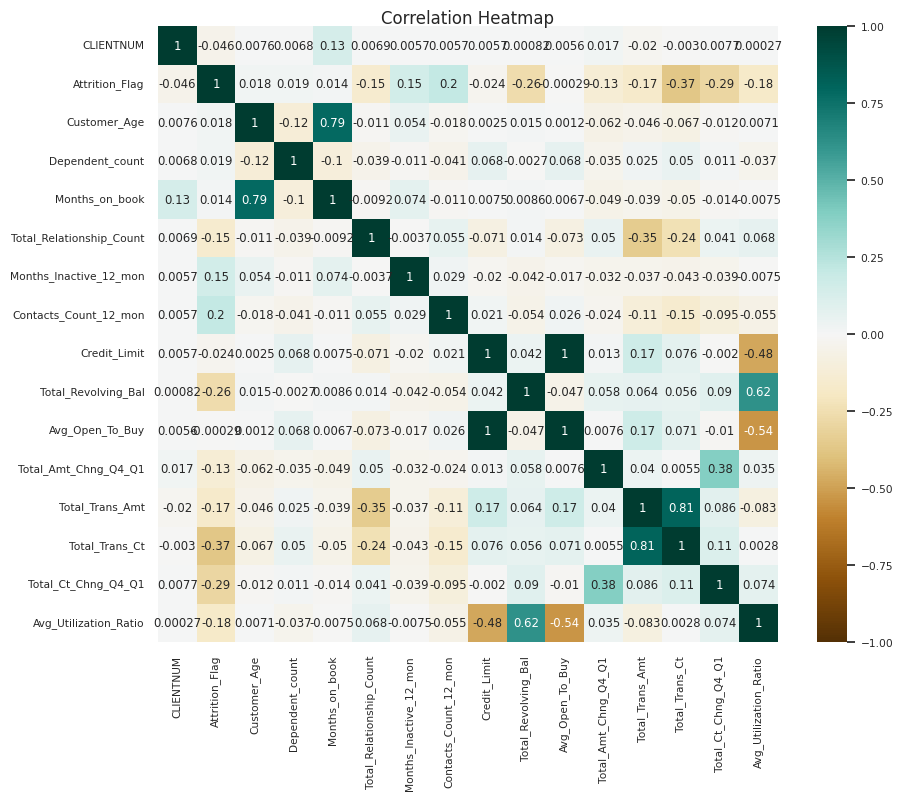

In [38]:
# Q uestion 6
# correlation map
plt.figure(figsize=(10,8))
sns.set(font_scale =0.7)

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=2);

## Data Pre-processing

In [39]:
# numeric columns of category origin conversion to category type
category_columns = data.select_dtypes(include="object").columns.tolist()
data[category_columns] = data[category_columns].astype("category")

In [40]:
# function to standardize columns
def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns] # dropping space and replacing caplocks alphabet (good practice)
    return df_

In [41]:
# apply the function to data
feature_name_standardize(data)

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000


In [42]:
# auxiliary functions imported just in case

def impute_category_unknown(df: pd.DataFrame, fill_value: str):    # a custom imputer function
    df_ = df.copy()
    for col in df_.select_dtypes(include = 'category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_


def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):   # a function to treat incorrect value
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')

    return df_

In [43]:
## data preprocessing: some auxiliary classes imported, just in case

# acustom data preprocessing class with fit and transform methods for standardising column names

class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_


# a custom data preprocessing class with fit and transform methods for dropping columns

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_


# a custom data preprocessing class with fit and transform methods for custom value masking

class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_


# a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_

# a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_

In [44]:
# make a copy to be used for the clasifying task
df = data.copy()
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,NaN,NaN,NaN,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Attrition_Flag,10127.000,NaN,NaN,NaN,0.161,0.367,0.000,0.000,0.000,0.000,1.000
Customer_Age,10127.000,NaN,NaN,NaN,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.000,NaN,NaN,NaN,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Education_Level,10127,7,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,10127,4,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.000,NaN,NaN,NaN,35.928,7.986,13.000,31.000,36.000,40.000,56.000


In [45]:
## the static variables to be defined first

# for dropping columns
columns_to_drop = [
    "clientnum",
    "credit_limit",
    "dependent_count",
    "months_on_book",
    "avg_open_to_buy",
    "customer_age",
]

# for masking a particular value in a feature
column_to_mask_value = "income_category"
value_to_mask = "abc"
masked_value = "Unknown"

# random state and loss
seed = 1
loss_func = "logloss"

# test and Validation sizes
test_size = 0.2
val_size = 0.25

# dependent Varibale Value map
target_mapper = {"Attrited Customer": 1, "Existing Customer": 0}

In [46]:
# replace missing values in 'Education_Level' and 'Marital_Status' with mode
df['Education_Level'].fillna(df['Education_Level'].mode()[0], inplace=True)
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace=True)

In [47]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [48]:
X = df.drop(columns=["Attrition_Flag"])
y = df["Attrition_Flag"]

In [49]:
y.unique()

array([0, 1])

In [50]:
# data split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, stratify=y)  # entire data into temporary 80% and test 20%
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp) # temporary data into train 75% and validation 25%

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 20) (2026, 20) (2026, 20)


In [51]:
print("Training: \n", y_train.value_counts(normalize=True))
print("\n\nValidation: \n", y_val.value_counts(normalize=True))
print("\n\nTest: \n", y_test.value_counts(normalize=True))

Training: 
 0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64


Validation: 
 0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64


Test: 
 0   0.840
1   0.160
Name: Attrition_Flag, dtype: float64


## Missing value imputation




In [52]:
# to standardize feature names
feature_name_standardizer = FeatureNamesStandardizer()

X_train = feature_name_standardizer.fit_transform(X_train)
X_val = feature_name_standardizer.transform(X_val)
X_test = feature_name_standardizer.transform(X_test)

# to Drop unnecessary columns
column_dropper = ColumnDropper(features=columns_to_drop)

X_train = column_dropper.fit_transform(X_train)
X_val = column_dropper.transform(X_val)
X_test = column_dropper.transform(X_test)

# to Mask incorrect/meaningless value of a feature
value_masker = CustomValueMasker(
    feature=column_to_mask_value, value_to_mask=value_to_mask, masked_value=masked_value
)

X_train = value_masker.fit_transform(X_train)
X_val = value_masker.transform(X_val)
X_test = value_masker.transform(X_test)

# to impute categorical Nulls to Unknown
cat_columns = X_train.select_dtypes(include="category").columns.tolist()
imputer = FillUnknown()

X_train[cat_columns] = imputer.fit_transform(X_train[cat_columns])
X_val[cat_columns] = imputer.transform(X_val[cat_columns])
X_test[cat_columns] = imputer.transform(X_test[cat_columns])

# to encode the data
one_hot = PandasOneHot()

X_train = one_hot.fit_transform(X_train)
X_val = one_hot.transform(X_val)
X_test = one_hot.transform(X_test)


# scale the numerical columns
robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
num_columns = [
    "total_relationship_count",
    "months_inactive_12_mon",
    "contacts_count_12_mon",
    "total_revolving_bal",
    "total_amt_chng_q4_q1",
    "total_trans_amt",
    "total_trans_ct",
    "total_ct_chng_q4_q1",
    "avg_utilization_ratio",
]

X_train[num_columns] = pd.DataFrame(
    robust_scaler.fit_transform(X_train[num_columns]),
    columns=num_columns,
    index=X_train.index,
)
X_val[num_columns] = pd.DataFrame(
    robust_scaler.transform(X_val[num_columns]), columns=num_columns, index=X_val.index
)
X_test[num_columns] = pd.DataFrame(
    robust_scaler.transform(X_test[num_columns]),
    columns=num_columns,
    index=X_test.index,
)

In [53]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

total_relationship_count          0
months_inactive_12_mon            0
contacts_count_12_mon             0
total_revolving_bal               0
total_amt_chng_q4_q1              0
total_trans_amt                   0
total_trans_ct                    0
total_ct_chng_q4_q1               0
avg_utilization_ratio             0
gender_M                          0
education_level_Doctorate         0
education_level_Graduate          0
education_level_High School       0
education_level_Post-Graduate     0
education_level_Uneducated        0
education_level_Unknown           0
marital_status_Married            0
marital_status_Single             0
marital_status_Unknown            0
income_category_$40K - $60K       0
income_category_$60K - $80K       0
income_category_$80K - $120K      0
income_category_Less than $40K    0
income_category_Unknown           0
card_category_Gold                0
card_category_Platinum            0
card_category_Silver              0
dtype: int64
---------------

In [54]:
X_train.head()

,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_M,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,education_level_Unknown,marital_status_Married,marital_status_Single,marital_status_Unknown,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,income_category_Unknown,card_category_Gold,card_category_Platinum,card_category_Silver
800,3.000,4.000,3.000,1.226,2.044,0.648,1.278,2.249,0.168,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
498,3.000,2.000,0.000,1.450,1.697,0.524,0.861,2.667,1.376,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
4356,2.500,1.000,2.000,1.926,3.829,1.661,2.194,3.717,0.775,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
407,3.000,2.000,0.000,0.000,2.675,0.464,1.083,1.266,0.000,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
8728,1.000,2.000,3.000,1.037,3.307,2.971,2.333,3.165,0.188,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [55]:
X_val.head()

,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_M,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,education_level_Unknown,marital_status_Married,marital_status_Single,marital_status_Unknown,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,income_category_Unknown,card_category_Gold,card_category_Platinum,card_category_Silver
2894,2.500,2.000,3.000,0.000,5.083,1.148,1.528,4.068,0.000,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
9158,0.500,3.000,1.000,0.000,3.982,3.148,1.639,3.810,0.000,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
9618,1.500,4.000,3.000,1.584,3.860,5.291,2.833,2.300,0.126,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
9910,1.500,2.000,3.000,0.854,3.162,6.000,2.889,3.481,0.241,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
5497,2.500,2.000,2.000,1.237,2.421,1.606,1.972,2.591,1.261,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [56]:
X_test.head()


,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_M,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,education_level_Unknown,marital_status_Married,marital_status_Single,marital_status_Unknown,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,income_category_Unknown,card_category_Gold,card_category_Platinum,card_category_Silver
9760,1.000,3.000,2.000,0.865,3.316,5.556,2.583,2.544,0.369,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
7413,2.000,3.000,2.000,0.000,3.219,0.850,1.139,2.190,0.000,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
6074,1.500,3.000,3.000,0.000,3.237,1.658,2.056,3.215,0.000,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3520,2.000,3.000,4.000,1.926,1.860,0.637,0.750,2.110,0.218,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
6103,2.500,3.000,4.000,1.926,3.250,1.034,1.556,1.840,1.223,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [57]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)  ## Complete the code to impute missing values in X_val
X_test = pd.get_dummies(X_test, drop_first=True)  ## Complete the code to impute missing values in X_val
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 27) (2026, 27) (2026, 27)


In [58]:
# check the top 5 rows from the train dataset
X_train.head()

,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_M,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,education_level_Unknown,marital_status_Married,marital_status_Single,marital_status_Unknown,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,income_category_Unknown,card_category_Gold,card_category_Platinum,card_category_Silver
800,3.000,4.000,3.000,1.226,2.044,0.648,1.278,2.249,0.168,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
498,3.000,2.000,0.000,1.450,1.697,0.524,0.861,2.667,1.376,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
4356,2.500,1.000,2.000,1.926,3.829,1.661,2.194,3.717,0.775,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
407,3.000,2.000,0.000,0.000,2.675,0.464,1.083,1.266,0.000,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
8728,1.000,2.000,3.000,1.037,3.307,2.971,2.333,3.165,0.188,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

# <font color = "blue">**Function to get scores of the models**

In [59]:
def get_metrics_score(
    model, train, test, train_y, test_y, threshold=0.5, flag=False, roc=True
):
    """
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    """
    # defining an empty list to store train and test results

    score_list = []

    pred_train = model.predict_proba(train)[:, 1] > threshold
    pred_test = model.predict_proba(test)[:, 1] > threshold

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)

    train_acc = accuracy_score(pred_train, train_y)
    test_acc = accuracy_score(pred_test, test_y)

    train_recall = recall_score(train_y, pred_train)
    test_recall = recall_score(test_y, pred_test)

    train_precision = precision_score(train_y, pred_train)
    test_precision = precision_score(test_y, pred_test)

    train_f1 = f1_score(train_y, pred_train)
    test_f1 = f1_score(test_y, pred_test)

    pred_train_proba = model.predict_proba(train)[:, 1]
    pred_test_proba = model.predict_proba(test)[:, 1]

    train_roc_auc = roc_auc_score(train_y, pred_train_proba)
    test_roc_auc = roc_auc_score(test_y, pred_test_proba)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
            train_roc_auc,
            test_roc_auc,
        )
    )

    if flag == True:

        print("Accuracy on training set : ", accuracy_score(pred_train, train_y))
        print("Accuracy on test set : ", accuracy_score(pred_test, test_y))
        print("Recall on training set : ", recall_score(train_y, pred_train))
        print("Recall on test set : ", recall_score(test_y, pred_test))
        print("Precision on training set : ", precision_score(train_y, pred_train))
        print("Precision on test set : ", precision_score(test_y, pred_test))
        print("F1 on training set : ", f1_score(train_y, pred_train))
        print("F1 on test set : ", f1_score(test_y, pred_test))

    if roc == True:
        if flag == True:
            print(
                "ROC-AUC Score on training set : ",
                roc_auc_score(train_y, pred_train_proba),
            )
            print(
                "ROC-AUC Score on test set : ", roc_auc_score(test_y, pred_test_proba)
            )

    return score_list  # returning the list with train and test scores

# <font color = "blue">**Function to Draw Confusion Matrix**

In [60]:
def make_confusion_matrix(model, test_X, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth

    """
    y_predict = model.predict(test_X)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - Attrited", "Actual - Existing"]],
        columns=[i for i in ["Predicted - Attrited", "Predicted - Existing"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(5, 3))
    sns.heatmap(df_cm, annot=labels, fmt="", cmap="Blues").set(title="Confusion Matrix")

# <font color = "blue">**Function to Add Scores to Scoring Lists**

In [62]:
# # defining empty lists to add train and test results

model_names = []
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
roc_auc_train = []
roc_auc_test = []
cross_val_train = []


def add_score_model(model_name, score, cv_res):
    """Add scores to list so that we can compare all models score together"""
    model_names.append(model_name)
    acc_train.append(score[0])
    acc_test.append(score[1])
    recall_train.append(score[2])
    recall_test.append(score[3])
    precision_train.append(score[4])
    precision_test.append(score[5])
    f1_train.append(score[6])
    f1_test.append(score[7])
    roc_auc_train.append(score[8])
    roc_auc_test.append(score[9])
    cross_val_train.append(cv_res)

### Model Building with original data

Sample code for model building with original data

In [63]:
models = []  # Empty list to store all the models
cv_results = []

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=seed)))
models.append(("Random forest", RandomForestClassifier(random_state=seed)))
models.append(("GBM", GradientBoostingClassifier(random_state=seed)))
models.append(("Adaboost", AdaBoostClassifier(random_state=seed)))
models.append(("Xgboost", XGBClassifier(random_state=seed, eval_metric=loss_func)))


# For each model, run cross validation on 9 folds (+ 1 validation fold) with scoring for recall
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)  # Setting number of splits equal to 10

    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold)
    cv_results.append(cv_result)

    model.fit(X_train, y_train)
    model_score = get_metrics_score(model, X_train, X_val, y_train, y_val)
    add_score_model(name, model_score, cv_result.mean())

print("models built!")

models built!


In [64]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)

# sorting models in decreasing order of test recall
comparison_frame.sort_values(
    by=["Cross_Val_Score_Train", "Test_Recall"], ascending=False
).style.highlight_max(color="green", axis=0).highlight_min(color="yellow", axis=0)

,Model,Cross_Val_Score_Train,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1,Train_ROC_AUC,Test_ROC_AUC
4,Xgboost,0.849379,0.999835,0.966436,1.000000,0.874233,0.998976,0.913462,0.999488,0.893417,1.000000,0.993060
2,GBM,0.817620,0.969712,0.969398,0.873975,0.874233,0.933260,0.931373,0.902646,0.901899,0.992689,0.989946
3,Adaboost,0.799137,0.956379,0.961007,0.830943,0.849693,0.890231,0.902280,0.859565,0.875197,0.987073,0.979432
0,Bagging,0.785862,0.996049,0.954590,0.980533,0.822086,0.994802,0.887417,0.987616,0.853503,0.999899,0.978021
1,Random forest,0.770440,1.000000,0.959526,1.000000,0.812883,1.000000,0.926573,1.000000,0.866013,1.000000,0.983956


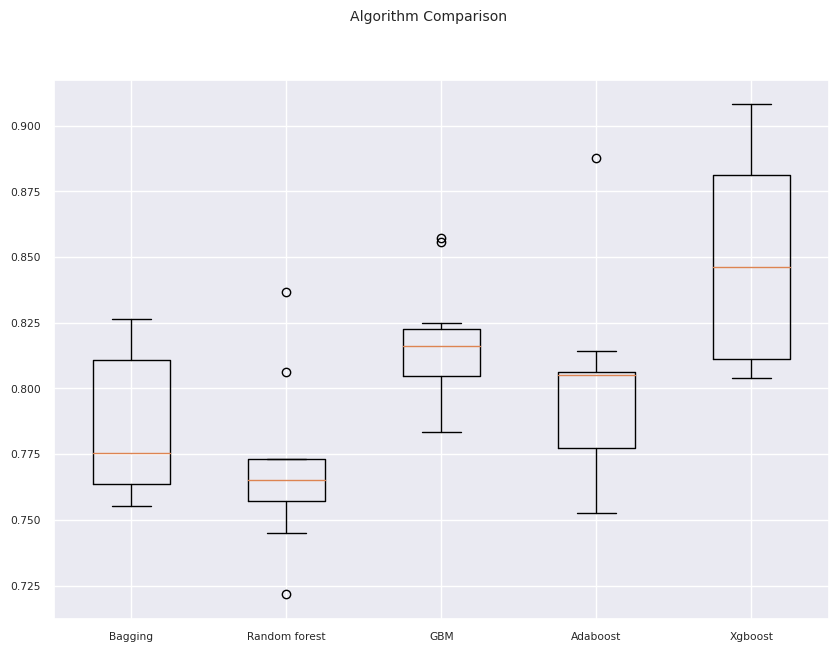

In [65]:
# plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(cv_results)
ax.set_xticklabels(model_names)

plt.show()

<font color = "blue"> **observation:** It appears XGBoost, and Bagging are the models with good potential. AdaBoost also looks good with the higher end outlier performance score

### Model Building with Oversampled data


In [66]:
 # Synthetic Minority Over Sampling Technique

print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=seed)

X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 976
Before UpSampling, counts of label 'No': 5099 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 27)
After UpSampling, the shape of train_y: (10198,) 



In [67]:
## Build Models with Oversampled Data

models_over = []

# appending models into the list
models_over.append(("Bagging UpSampling", BaggingClassifier(random_state=seed)))
models_over.append(("Random forest UpSampling", RandomForestClassifier(random_state=seed)))
models_over.append(("GBM UpSampling", GradientBoostingClassifier(random_state=seed)))
models_over.append(("Adaboost UpSampling", AdaBoostClassifier(random_state=seed)))
models_over.append(("Xgboost UpSampling", XGBClassifier(random_state=seed, eval_metric=loss_func)))


for name, model in models_over:
    scoring = "recall"
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)  # Setting number of splits equal to 10

    cv_result_over = cross_val_score(estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
    cv_results.append(cv_result_over)

    model.fit(X_train_over, y_train_over)
    model_score_over = get_metrics_score(model, X_train_over, X_val, y_train_over, y_val)
    add_score_model(name, model_score_over, cv_result_over.mean())

print("Upsampled models built!")

Upsampled models built!


In [68]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)

# sorting models in decreasing order of test recall
comparison_frame.sort_values(
    by=["Test_Recall", "Cross_Val_Score_Train"], ascending=False
).style.highlight_max(color="green", axis=0).highlight_min(color="yellow", axis=0)

,Model,Cross_Val_Score_Train,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1,Train_ROC_AUC,Test_ROC_AUC
8,Adaboost UpSampling,0.952145,0.949010,0.942744,0.956462,0.926380,0.942415,0.766497,0.949387,0.838889,0.990777,0.982799
7,GBM UpSampling,0.966855,0.969994,0.952616,0.976074,0.901840,0.964348,0.821229,0.970175,0.859649,0.995756,0.987665
9,Xgboost UpSampling,0.980193,1.000000,0.966436,1.000000,0.892638,1.000000,0.898148,1.000000,0.895385,1.000000,0.992173
6,Random forest UpSampling,0.979799,1.000000,0.955084,1.000000,0.886503,1.000000,0.842566,1.000000,0.863976,1.000000,0.986231
4,Xgboost,0.849379,0.999835,0.966436,1.000000,0.874233,0.998976,0.913462,0.999488,0.893417,1.000000,0.993060
2,GBM,0.817620,0.969712,0.969398,0.873975,0.874233,0.933260,0.931373,0.902646,0.901899,0.992689,0.989946
5,Bagging UpSampling,0.959794,0.997549,0.943731,0.996862,0.855828,0.998233,0.806358,0.997547,0.830357,0.999979,0.979070
3,Adaboost,0.799137,0.956379,0.961007,0.830943,0.849693,0.890231,0.902280,0.859565,0.875197,0.987073,0.979432
0,Bagging,0.785862,0.996049,0.954590,0.980533,0.822086,0.994802,0.887417,0.987616,0.853503,0.999899,0.978021
1,Random forest,0.770440,1.000000,0.959526,1.000000,0.812883,1.000000,0.926573,1.000000,0.866013,1.000000,0.983956


### Model Building with Undersampled data

In [69]:
# random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 27)
After Under Sampling, the shape of train_y: (1952,) 



In [70]:
## Build Models with Undersampled Data

models_under = []

# appending models into the list

models_under.append(("Bagging DownSampling", BaggingClassifier(random_state=seed)))
models_under.append(("Random forest DownSampling", RandomForestClassifier(random_state=seed)))
models_under.append(("GBM DownSampling", GradientBoostingClassifier(random_state=seed)))
models_under.append(("Adaboost DownSampling", AdaBoostClassifier(random_state=seed)))
models_under.append(("Xgboost DownSampling", XGBClassifier(random_state=seed, eval_metric=loss_func)))


for name, model in models_under:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10

    cv_result_under = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    cv_results.append(cv_result_under)

    model.fit(X_train_un, y_train_un)
    model_score_under = get_metrics_score(model, X_train_un, X_val, y_train_un, y_val)
    add_score_model(name, model_score_under, cv_result_under.mean())

print("Undersampled models built!")

Undersampled models built!


In [71]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(
    by=["Test_Recall", "Cross_Val_Score_Train"], ascending=False
).style.highlight_max(color="green", axis=0).highlight_min(color="yellow", axis=0)

,Model,Cross_Val_Score_Train,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1,Train_ROC_AUC,Test_ROC_AUC
13,Adaboost DownSampling,0.925174,0.947746,0.936328,0.952869,0.963190,0.943205,0.728538,0.948012,0.829590,0.989348,0.985150
14,Xgboost DownSampling,0.947696,1.000000,0.938302,1.000000,0.960123,1.000000,0.736471,1.000000,0.833555,1.000000,0.989587
12,GBM DownSampling,0.951799,0.967725,0.938796,0.979508,0.957055,0.956957,0.739336,0.968101,0.834225,0.995357,0.989749
11,Random forest DownSampling,0.935388,1.000000,0.928430,1.000000,0.932515,1.000000,0.711944,1.000000,0.807437,1.000000,0.979840
10,Bagging DownSampling,0.920029,0.994365,0.924482,0.990779,0.932515,0.997936,0.698851,0.994344,0.798949,0.999701,0.972970
8,Adaboost UpSampling,0.952145,0.949010,0.942744,0.956462,0.926380,0.942415,0.766497,0.949387,0.838889,0.990777,0.982799
7,GBM UpSampling,0.966855,0.969994,0.952616,0.976074,0.901840,0.964348,0.821229,0.970175,0.859649,0.995756,0.987665
9,Xgboost UpSampling,0.980193,1.000000,0.966436,1.000000,0.892638,1.000000,0.898148,1.000000,0.895385,1.000000,0.992173
6,Random forest UpSampling,0.979799,1.000000,0.955084,1.000000,0.886503,1.000000,0.842566,1.000000,0.863976,1.000000,0.986231
4,Xgboost,0.849379,0.999835,0.966436,1.000000,0.874233,0.998976,0.913462,0.999488,0.893417,1.000000,0.993060


### HyperparameterTuning

#### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
```

In [72]:
# for Gradient Boosting
%%time


# defining model
model = GradientBoostingClassifier(random_state=seed, loss='deviance')


# parameter grid to pass in RandomizedSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# calling RandomizedSearchCV
gb_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=seed, n_jobs = -1)

# fitting parameters in RandomizedSearchCV
gb_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(gb_tuned.best_params_,gb_tuned.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.95386071954555:
CPU times: user 3.53 s, sys: 397 ms, total: 3.93 s
Wall time: 2min 46s


In [73]:
# building model with best parameters
gb_tuned_model = GradientBoostingClassifier(
    subsample=0.7,
    n_estimators=125,
    max_features=0.5,
    learning_rate=0.05,
)
# Fit the model on training data
gb_tuned_model.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.05, max_features=0.5,
                           n_estimators=125, subsample=0.7)

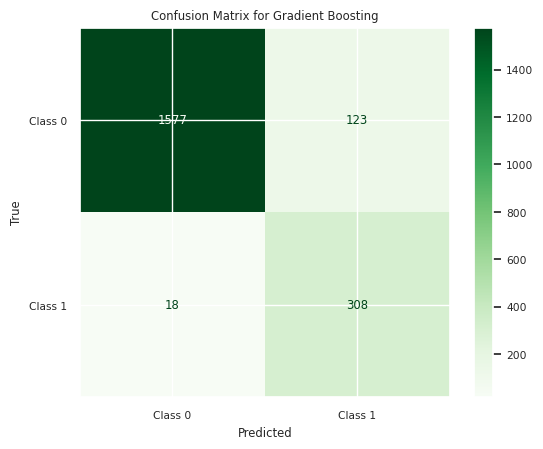

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay

y_prediction = gb_tuned_model.predict(X_val)

# create a confusion matrix
cm = confusion_matrix(y_val, y_prediction)

# create a ConfusionMatrixDisplay object for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# plot the confusion matrix with graphical features
disp.plot(cmap=plt.cm.Greens)

# add title and axis labels
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [75]:
# for AdaBoost
%%time

# defining model
model = AdaBoostClassifier(random_state=seed)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
ada_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=seed, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
ada_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(ada_tuned.best_params_,ada_tuned.best_score_))

Best parameters are {'n_estimators': 70, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.9436040395539658:
CPU times: user 3 s, sys: 219 ms, total: 3.22 s
Wall time: 2min 9s


In [77]:
# building model with best parameters
ada_tuned_model = AdaBoostClassifier(
    n_estimators=70, learning_rate=0.1, random_state=1,
)
# Fit the model on training data
ada_tuned_model.fit(X_train_un, y_train_un)

AdaBoostClassifier(learning_rate=0.1, n_estimators=70, random_state=1)

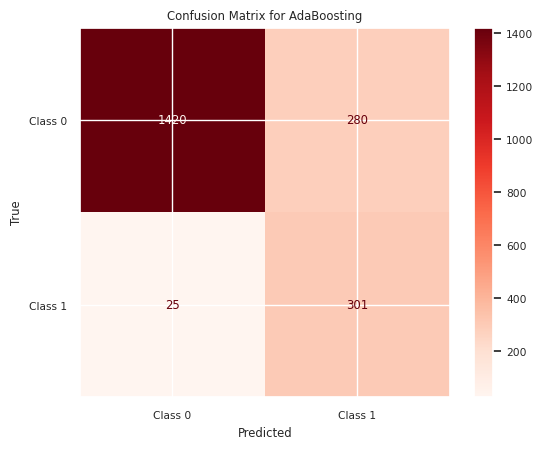

In [78]:
y_prediction = ada_tuned_model.predict(X_val)

# create a confusion matrix
cm = confusion_matrix(y_val, y_prediction)

# create a ConfusionMatrixDisplay object for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# plot the confusion matrix with graphical features
disp.plot(cmap=plt.cm.Reds)

# add title and axis labels
plt.title('Confusion Matrix for AdaBoosting')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [116]:
# for Bagging Classifier
%%time

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier(random_state=seed)

# defining model
model = BaggingClassifier(base_classifier, n_estimators=10, random_state=seed)


# parameter grid to pass in RandomizedSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# calling RandomizedSearchCV
bagging_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=seed, n_jobs = -1)

# fitting parameters in RandomizedSearchCV
bagging_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(bagging_tuned.best_params_,bagging_tuned.best_score_))

Best parameters are {'n_estimators': 30, 'max_samples': 1, 'max_features': 0.7} with CV score=1.0:
CPU times: user 1.43 s, sys: 112 ms, total: 1.54 s
Wall time: 1min


In [117]:
base_classifier = DecisionTreeClassifier(random_state=seed)
bagging_tuned_model = BaggingClassifier(base_classifier,
                                       n_estimators=30,  # Number of base estimators
                                       max_samples=1.0,  # Fraction of samples to draw for each base estimator
                                       max_features=0.7,  # Fraction of features to draw for each base estimator
                                       random_state=seed)

# Fit the model on training data
bagging_tuned_model.fit(X_train_un, y_train_un)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.7, n_estimators=30, random_state=1)

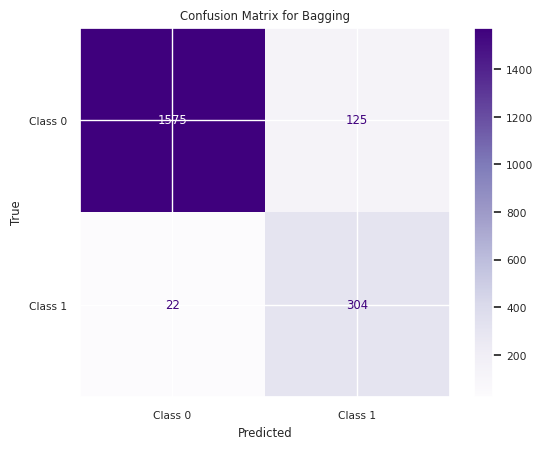

In [118]:
y_prediction = bagging_tuned_model.predict(X_val)

# create a confusion matrix
cm = confusion_matrix(y_val, y_prediction)

# create a ConfusionMatrixDisplay object for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# plot the confusion matrix with graphical features
disp.plot(cmap=plt.cm.Purples)

# add title and axis labels
plt.title('Confusion Matrix for Bagging')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [119]:
# for Random Forest Classifier
%%time

from sklearn.ensemble import RandomForestClassifier

# defining model
model = RandomForestClassifier(n_estimators=100, random_state=seed)


# parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# calling RandomizedSearchCV
randomforest_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=seed, n_jobs = -1)

# fitting parameters in RandomizedSearchCV
randomforest_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomforest_tuned.best_params_,randomforest_tuned.best_score_))

Best parameters are {'n_estimators': 200, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9344519250999369:
CPU times: user 2.6 s, sys: 218 ms, total: 2.82 s
Wall time: 2min 21s


In [121]:
# building model with best parameters
randomforest_tuned_model = RandomForestClassifier(
    n_estimators=200,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt'
)
# Fit the model on training data
randomforest_tuned_model.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.6, n_estimators=200)

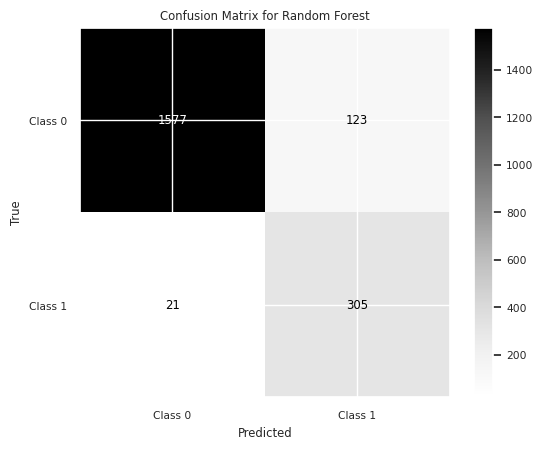

In [122]:
y_prediction = randomforest_tuned_model.predict(X_val)

# create a confusion matrix
cm = confusion_matrix(y_val, y_prediction)

# create a ConfusionMatrixDisplay object for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# plot the confusion matrix with graphical features
disp.plot(cmap=plt.cm.Greys)

# add title and axis labels
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [123]:
# for XGBoosting
%%time

# defining model
model = XGBClassifier(random_state=seed, eval_metric=loss_func)


# Parameter grid to pass in RandomizedSearchCV
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=seed, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned.best_params_,xgb_tuned.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9876919840100988:
CPU times: user 3.77 s, sys: 144 ms, total: 3.92 s
Wall time: 1min 2s


In [124]:
# building model with best parameters
xgb_tuned_model = XGBClassifier(
    n_estimators=200,
    scale_pos_weight=10,
    subsample=0.9,
    learning_rate=0.01,
    gamma=1,
)
# Fit the model on training data
xgb_tuned_model.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

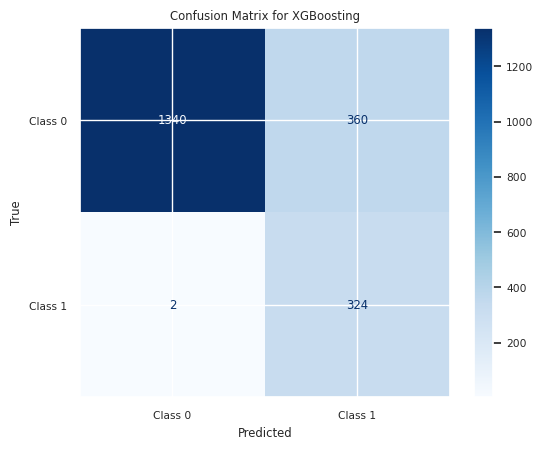

In [125]:
y_prediction = xgb_tuned_model.predict(X_val)

# create a confusion matrix
cm = confusion_matrix(y_val, y_prediction)

# create a ConfusionMatrixDisplay object for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# plot the confusion matrix with graphical features
disp.plot(cmap=plt.cm.Blues)

# add title and axis labels
plt.title('Confusion Matrix for XGBoosting')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

#### Sample tuning method for Decision tree with original data

In [108]:
# defining model
Model = XGBClassifier(random_state=seed, eval_metric=loss_func)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.8462899005756149:


#### Sample tuning method for Decision tree with oversampled data

In [109]:
# defining model
Model = XGBClassifier(random_state=seed, eval_metric=loss_func)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 5} with CV score=0.9558808135619312:


#### Sample tuning method for Decision tree with undersampled data

In [110]:
# defining model
Model = XGBClassifier(random_state=seed, eval_metric=loss_func)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 11} with CV score=0.9528937728937729:


## Model Comparison and Final Model Selection

In [111]:
# building the final model with best parameters
xgb_tuned_model = XGBClassifier(
    n_estimators=150,
    scale_pos_weight=10,
    subsample=1,
    reg_lambda=20,
    max_depth=11,
    learning_rate=0.01,
    gamma=0,
    eval_metric=loss_func,
    random_state=seed,
    min_samples_leaf = 1, min_impurity_decrease = 0.001, max_leaf_nodes = 15,
)
# Fit the model on training data
xgb_tuned_model.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=11,
              max_leaf_nodes=15, max_leaves=None, min_child_weight=None,
              min_impurity_decrease=0.001, min_samples_leaf=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150, ...)

### Test set final performance

In [112]:
xgb_tuned_model_score = get_metrics_score(xgb_tuned_model, X_train, X_val, y_train, y_val)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scoring = "recall"
xgb_down_cv = cross_val_score(estimator=xgb_tuned_model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)


add_score_model("XGB Tuned with Down Sampling", xgb_tuned_model_score, xgb_down_cv.mean())

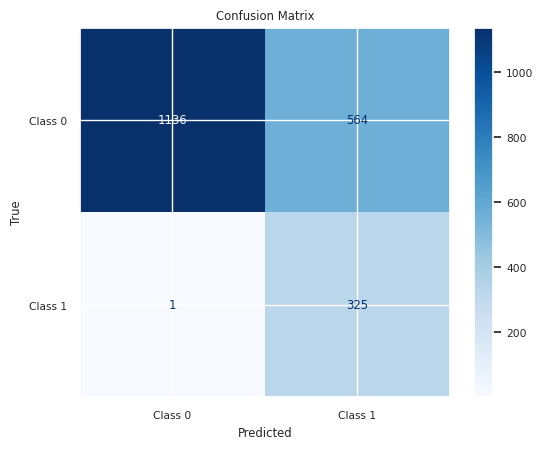

In [113]:
y_pred = xgb_tuned_model.predict(X_val)

# create a confusion matrix
cm = confusion_matrix(y_val, y_pred)

# create a ConfusionMatrixDisplay object for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# plot the confusion matrix with graphical features
disp.plot(cmap=plt.cm.Blues)

# add title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

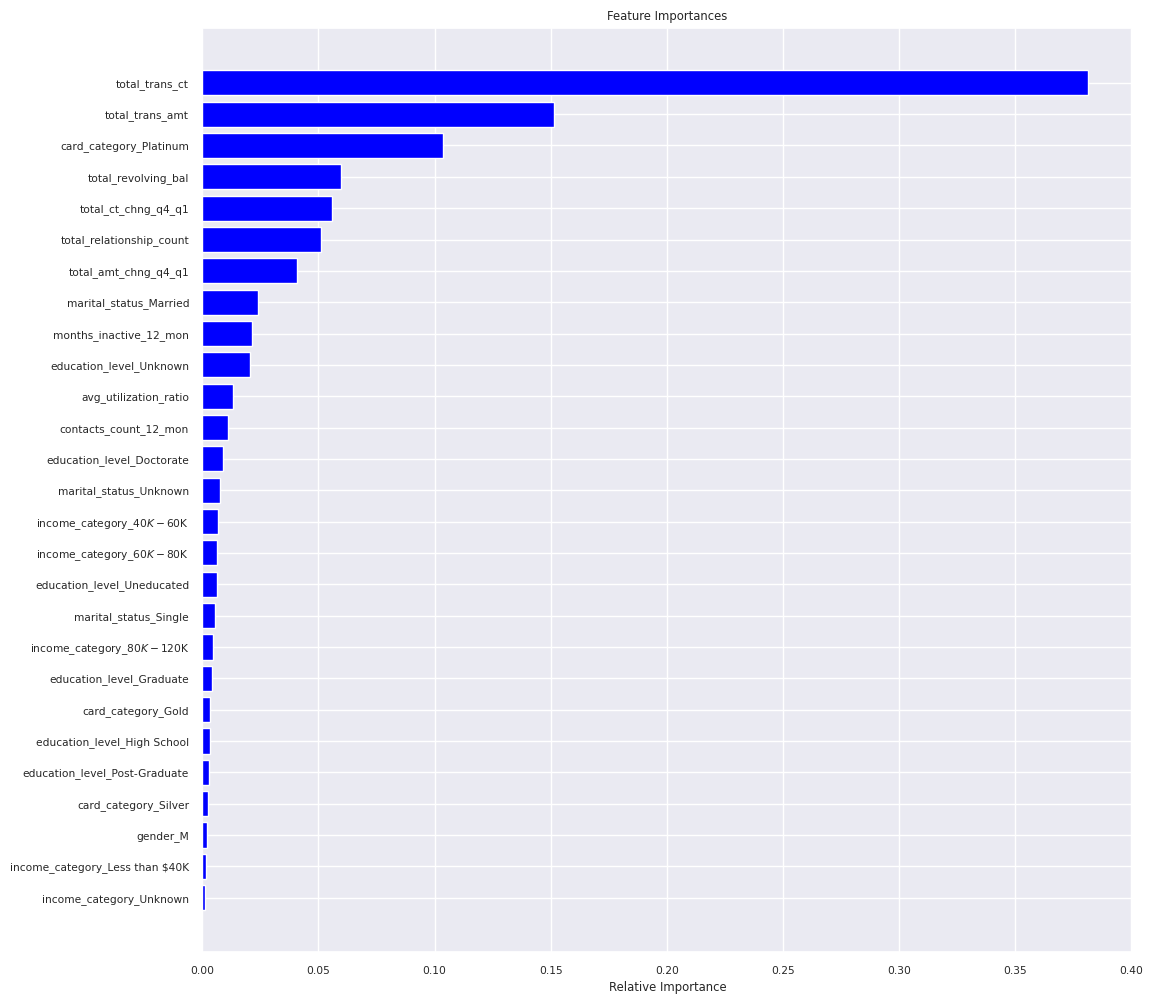

In [114]:
# features importance plotting

feature_names = X_train.columns
importances = xgb_tuned_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [115]:
xgb_tuned_model_test_score = get_metrics_score(
    xgb_tuned_model, X_train, X_test, y_train, y_test
)

final_model_names = ["xgb Tuned Down-sampled Trained"]
final_acc_train = [xgb_tuned_model_test_score[0]]
final_acc_test = [xgb_tuned_model_test_score[1]]
final_recall_train = [xgb_tuned_model_test_score[2]]
final_recall_test = [xgb_tuned_model_test_score[3]]
final_precision_train = [xgb_tuned_model_test_score[4]]
final_precision_test = [xgb_tuned_model_test_score[5]]
final_f1_train = [xgb_tuned_model_test_score[6]]
final_f1_test = [xgb_tuned_model_test_score[7]]
final_roc_auc_train = [xgb_tuned_model_test_score[8]]
final_roc_auc_test = [xgb_tuned_model_test_score[9]]

final_result_score = pd.DataFrame(
    {
        "Model": final_model_names,
        "Train_Accuracy": final_acc_train,
        "Test_Accuracy": final_acc_test,
        "Train_Recall": final_recall_train,
        "Test_Recall": final_recall_test,
        "Train_Precision": final_precision_train,
        "Test_Precision": final_precision_test,
        "Train_F1": final_f1_train,
        "Test_F1": final_f1_test,
        "Train_ROC_AUC": final_roc_auc_train,
        "Test_ROC_AUC": final_roc_auc_test,
    }
)


for col in final_result_score.select_dtypes(include="float64").columns.tolist():
    final_result_score[col] = final_result_score[col] * 100


final_result_score

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1,Train_ROC_AUC,Test_ROC_AUC
0,xgb Tuned Down-sampled Trained,71.407,70.829,100.000,99.385,35.975,35.417,52.914,52.223,97.501,96.568


# Business Insights and Conclusions

<font color ="blue">

1. <font color ="blue">Key Features: The most significant features for understanding customer credit card churn include Total Transaction Count, Total Transaction Amount, Total Revolving Balance, Total Amount Change Q4 to Q1, Total Count Change Q4 to Q1, and Total Relationship Count. These features exhibit a negative correlation with the Attrition Flag, meaning that lower values of these features indicate a higher likelihood of a customer churning.

2. <font color ="blue">Customer Engagement: To reduce churn, the bank should aim to enhance customer engagement. This can be achieved by increasing interactions with customers and offering various promotions, schemes, and benefits to strengthen the customer's relationship with the bank.

3. <font color ="blue">Cashback Offers: Implementing cashback schemes on credit cards can incentivize customers to use their credit cards more frequently. Cashback rewards can encourage increased credit card usage and transactions.

4. <font color ="blue">Credit Limit Increase: Regular credit card users should be offered credit limit increases. This strategy can boost credit card spending and transaction amounts as customers become more comfortable with higher credit limits.

5. <font color ="blue">0% Interest EMI: The bank can introduce 0% interest EMI (Equated Monthly Installments) options on credit card purchases. This offering allows customers to convert higher-cost purchases into manageable installments, increasing both total transaction amounts and transaction counts while also facilitating balance revolving.

6. <font color ="blue">Specialized Cards: To encourage more frequent card usage, the bank can introduce specialized credit cards tailored to specific purposes, such as online shopping or online food ordering. These cards could offer exclusive cashback offers or benefits related to the specific category.

7. <font color ="blue">Predictive Modeling: Leveraging the predictive capabilities of the model, the bank can identify customers at high risk of attrition. By proactively reaching out to these customers and discussing credit card offers, credit limit adjustments, and other retention strategies, the bank can aim to retain a significant portion of these customers.

<font color ="blue">These strategies collectively contribute to a customer-centric approach aimed at reducing churn and strengthening the bank's relationship with its credit card holders.